In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 500

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('hyper', to_data_frame=True)

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq_cuda/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [46]:
results[results['config.model'] == 'embedcvae'].sort_values('result.NMI_cluster/label').groupby('config.data').tail(5)

_id  config.overwrite config.db_collection  config.alpha_epoch_anneal  \
198  215               215                hyper                      100.0   
190  194               194                hyper                      100.0   
217  271               271                hyper                      100.0   
197  211               211                hyper                      100.0   
186  187               187                hyper                      100.0   
22    23                23                hyper                    10000.0   
33    34                34                hyper                  1000000.0   
14    15                15                hyper                    10000.0   
23    24                24                hyper                  1000000.0   
52    53                53                hyper                  1000000.0   

     config.clustering_res config.data  config.eta  config.hidden_layers  \
198                    1.5       brain         100                     1   
190                    2.0       brain         100                     2   
217                    1.5       brain          10                     4   
197                    2.0       brain          10                     2   
186                    1.0       brain         100                     2   
22                     2.0    pancreas          10                     2   
33                     1.0    pancreas          10                     3   
14                     2.0    pancreas          10                     3   
23                     1.5    pancreas         100                     2   
52                     2.0    pancreas         100                     2   

     config.latent_dim config.loss_metric  ... result.knn  result.ebm  \
198                 30               dist  ...   0.854752    0.447291   
190                 20               dist  ...   0.824865    0.508570   
217                 30               dist  ...   0.858887    0.566007   
197                 10               dist  ...   0.891392    0.440937   
186                 40               dist  ...   0.816900    0.523913   
22                  30               dist  ...   0.945343    0.490426   
33                  10               dist  ...   0.865989    0.519870   
14                  20               dist  ...   0.945611    0.622889   
23                  40               dist  ...   0.944512    0.699710   
52                  30               dist  ...   0.943694    0.700565   

     result.NMI_cluster/label  result.ARI_cluster/label result.ASW_label  \
198                  0.864190                 -4.618386         0.729273   
190                  0.868369                  0.625751         0.810449   
217                  0.871343                  0.949754         0.555232   
197                  0.871959                 -2.514826         0.658993   
186                  0.882825                  0.482943         0.805557   
22                   0.977559                  0.988446         0.921010   
33                   0.977742                  0.988487         0.937313   
14                   0.977913                  0.988983         0.951015   
23                   0.978003                  0.988107         0.965099   
52                   0.978050                  0.989080         0.965080   

    result.ASW_label/batch result.PCR_batch  result.isolated_label_F1  \
198               0.747711         0.768289                  0.954924   
190               0.704078         0.697739                  0.845054   
217               0.873347         0.708566                  0.939876   
197               0.769297         0.630557                  0.960220   
186               0.741673         0.723488                  0.841670   
22                0.831968         0.679703                  0.152174   
33                0.813438         0.667613                  0.105263   
14                0.802849         0.687723                  0.254545   
23         

In [31]:
results['result.integration_scores'].loc[0].columns


Index(['NMI_cluster/label', 'ARI_cluster/label', 'ASW_label',
       'ASW_label/batch', 'PCR_batch', 'isolated_label_F1',
       'isolated_label_silhouette', 'graph_conn', 'ebm', 'knn'],
      dtype='object')

In [33]:
results['result.f1-score'] = results['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)
for score in list(results['result.integration_scores'].loc[0].columns):
    results[f'result.{score}'] = results['result.integration_scores'].apply(
        lambda x: x[score]
    )

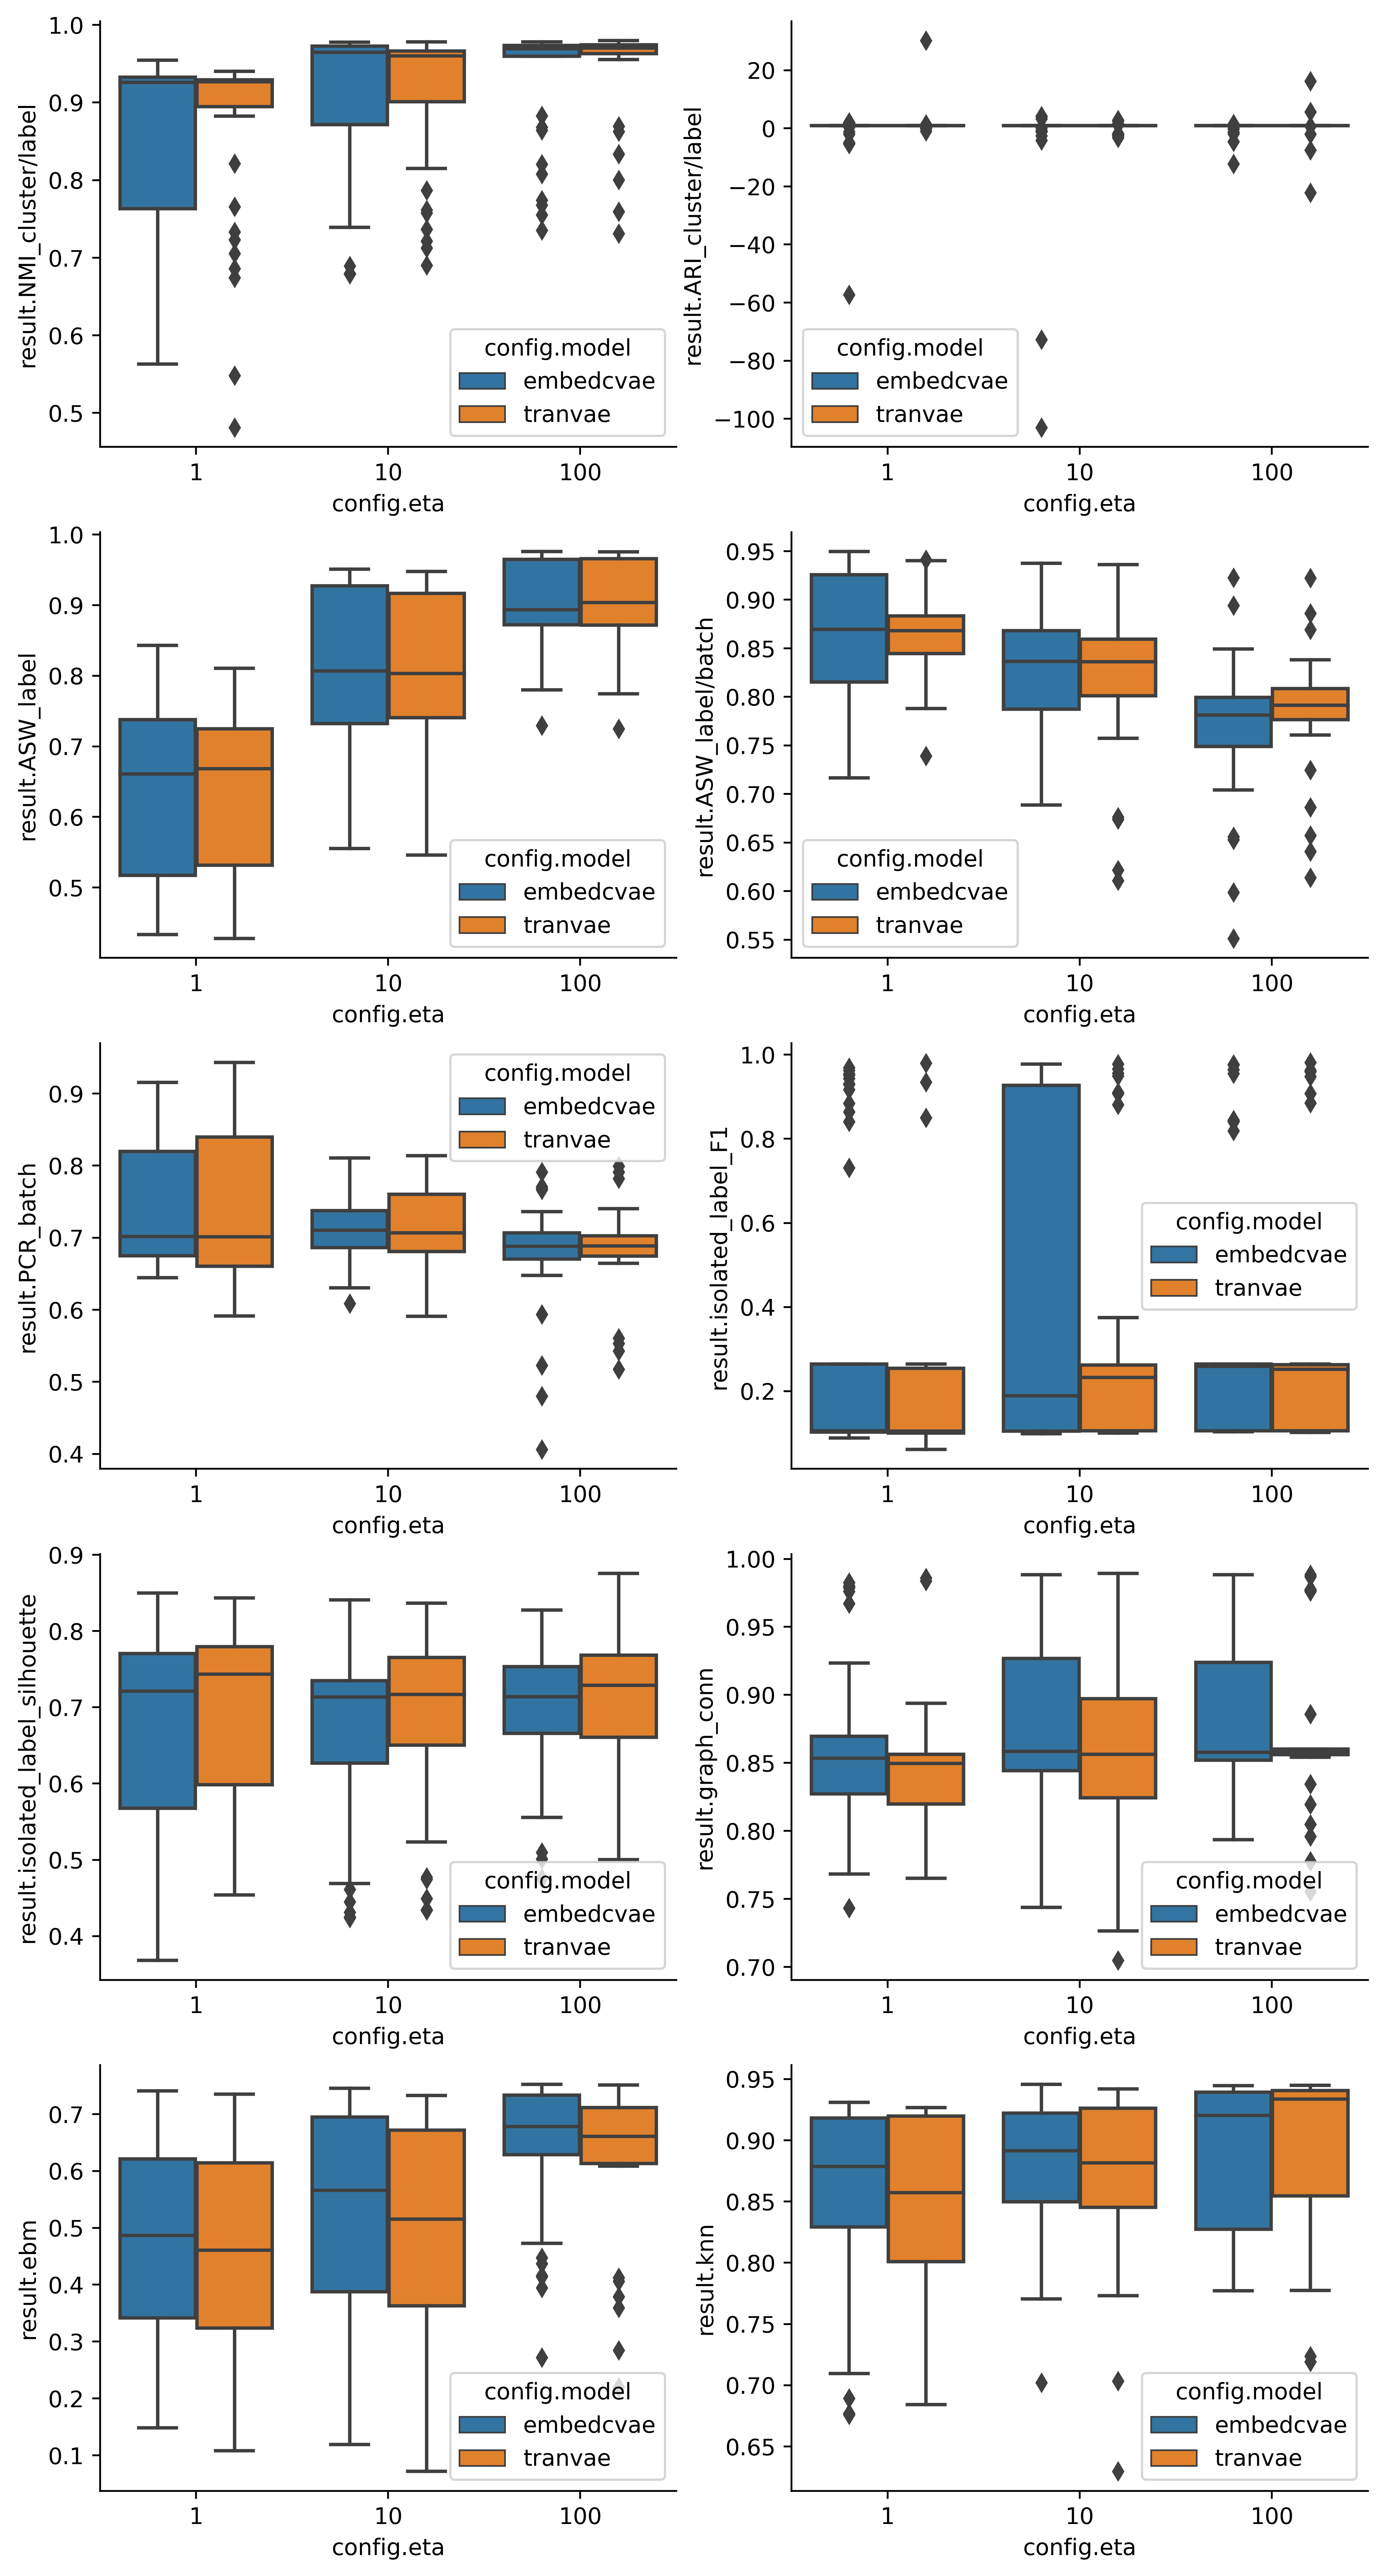

In [39]:
hyperparam = 'eta'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
ax = ax.flatten()
for i, score in enumerate(list(results['result.integration_scores'].loc[0].columns)):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{score}'],
        hue=results['config.model'],
        ax=ax[i]
    )
    #ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

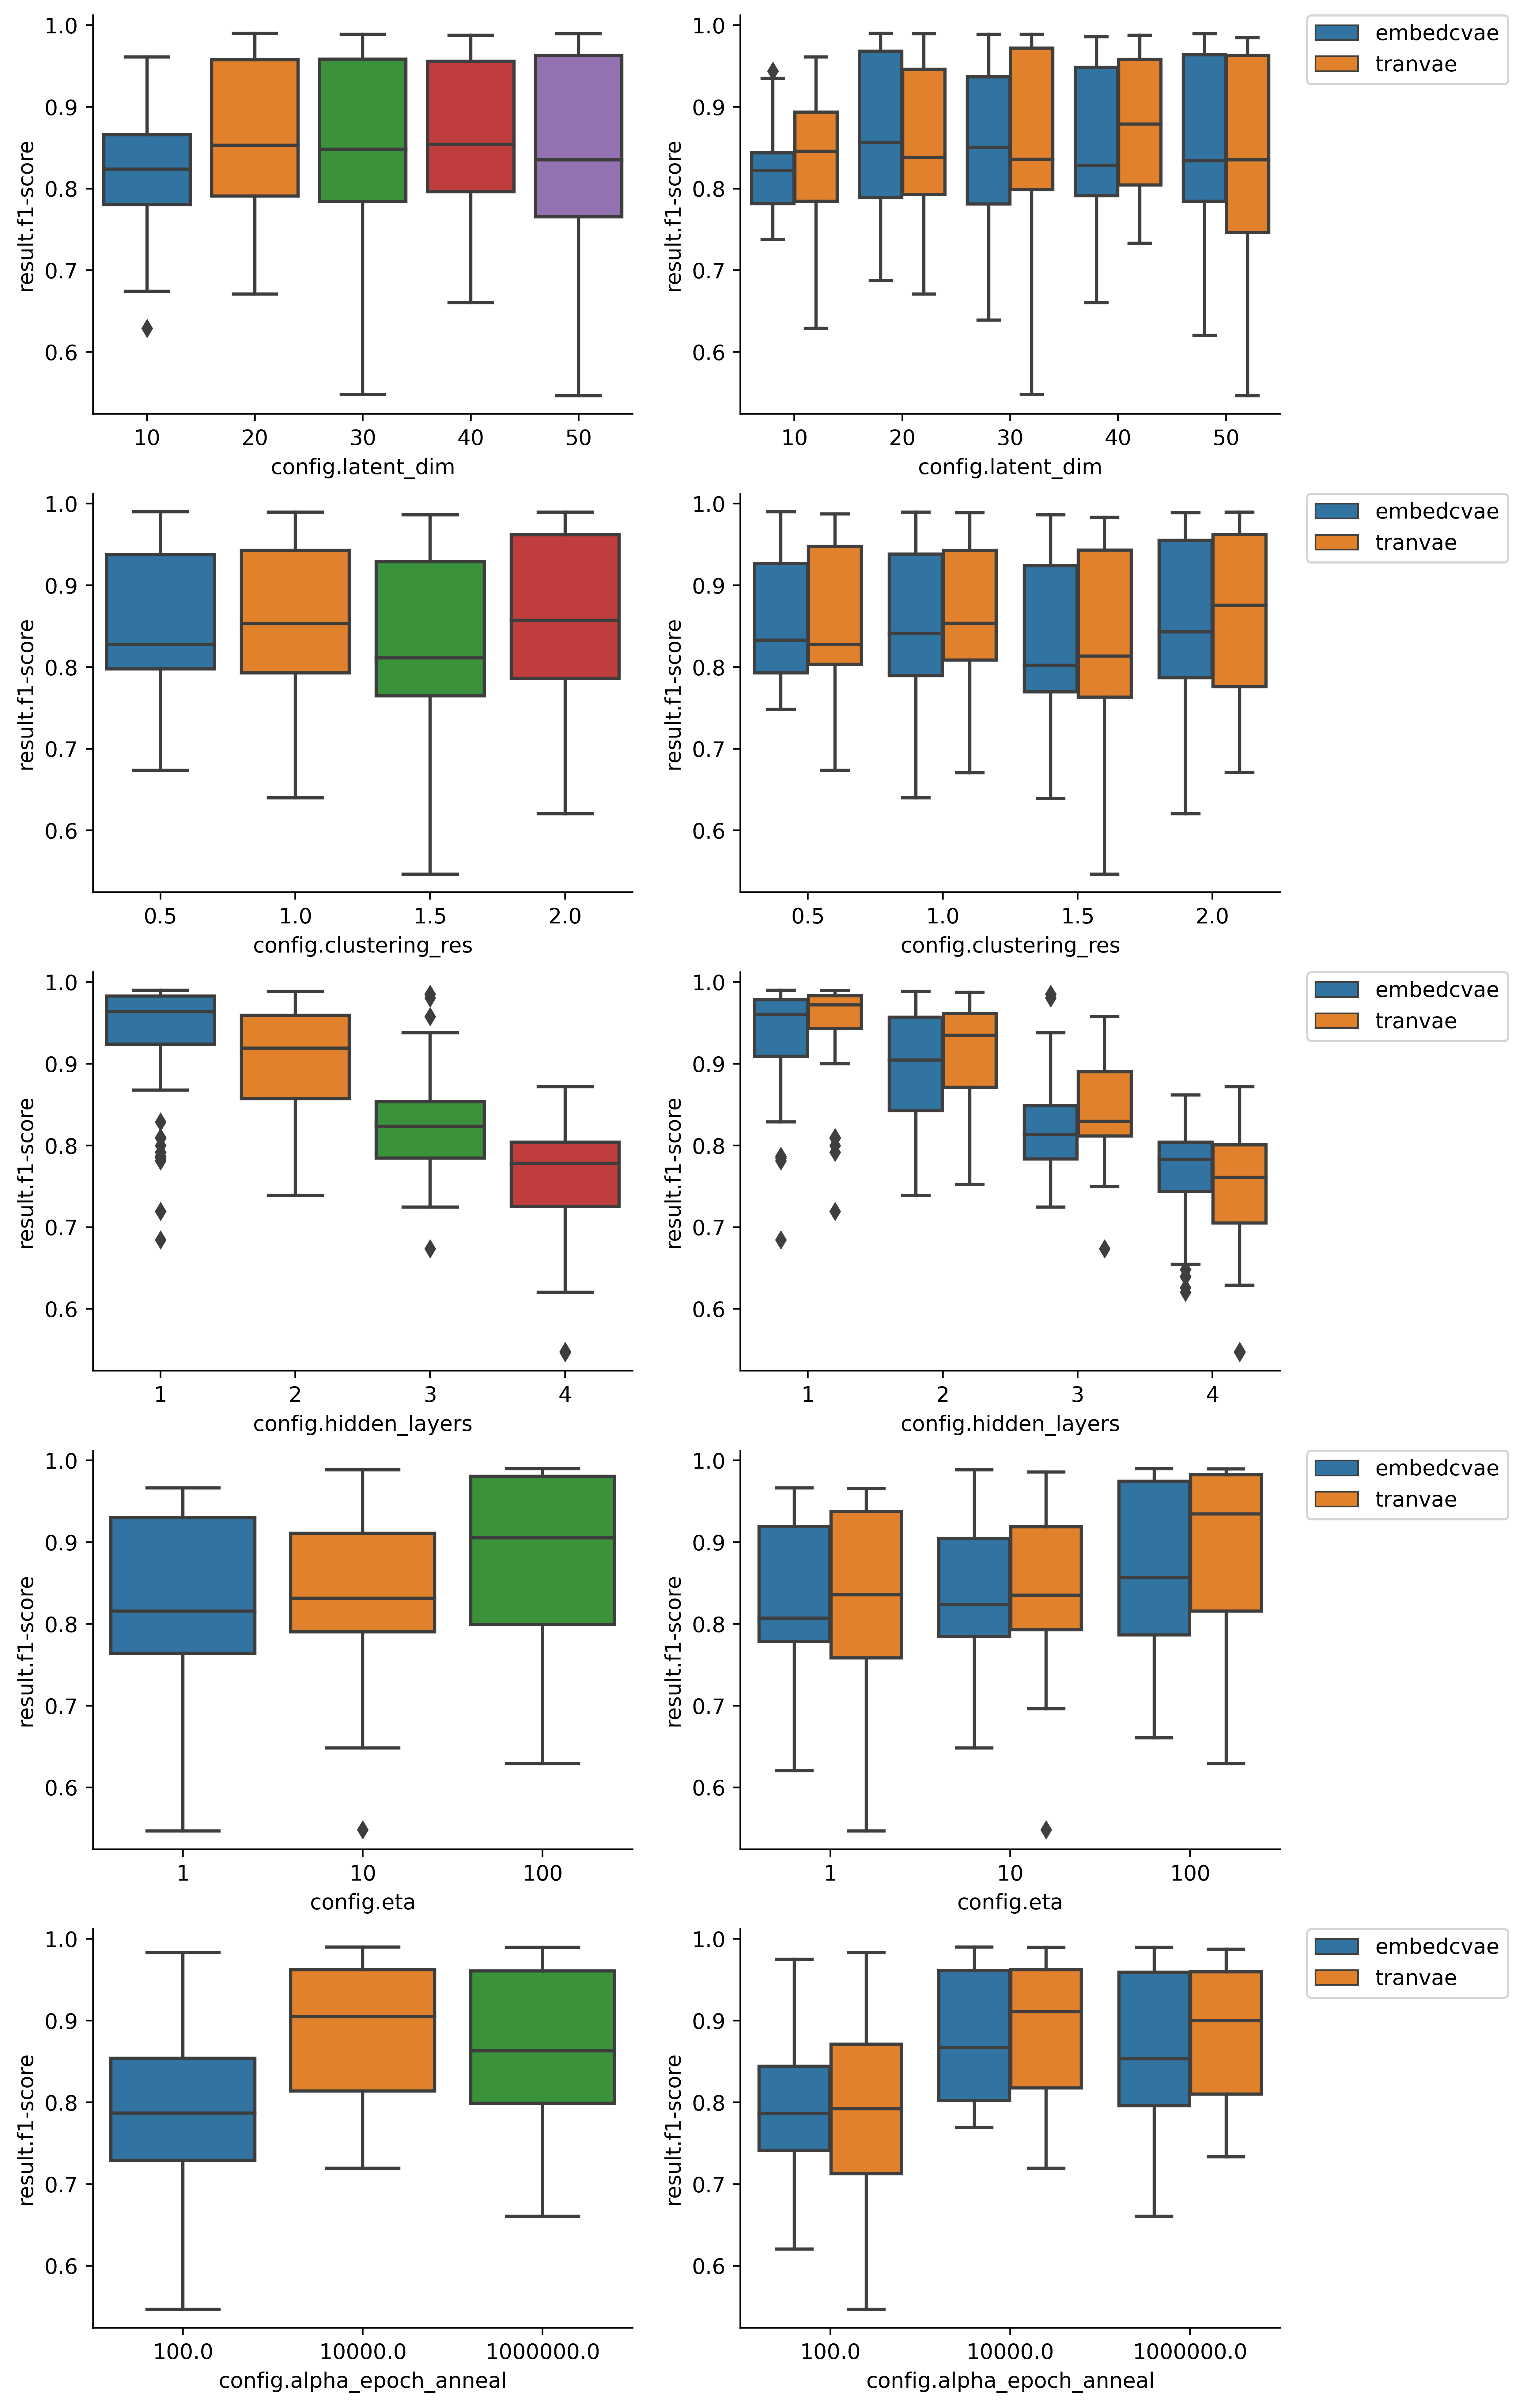

In [40]:
RESULT = 'f1-score'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.model'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

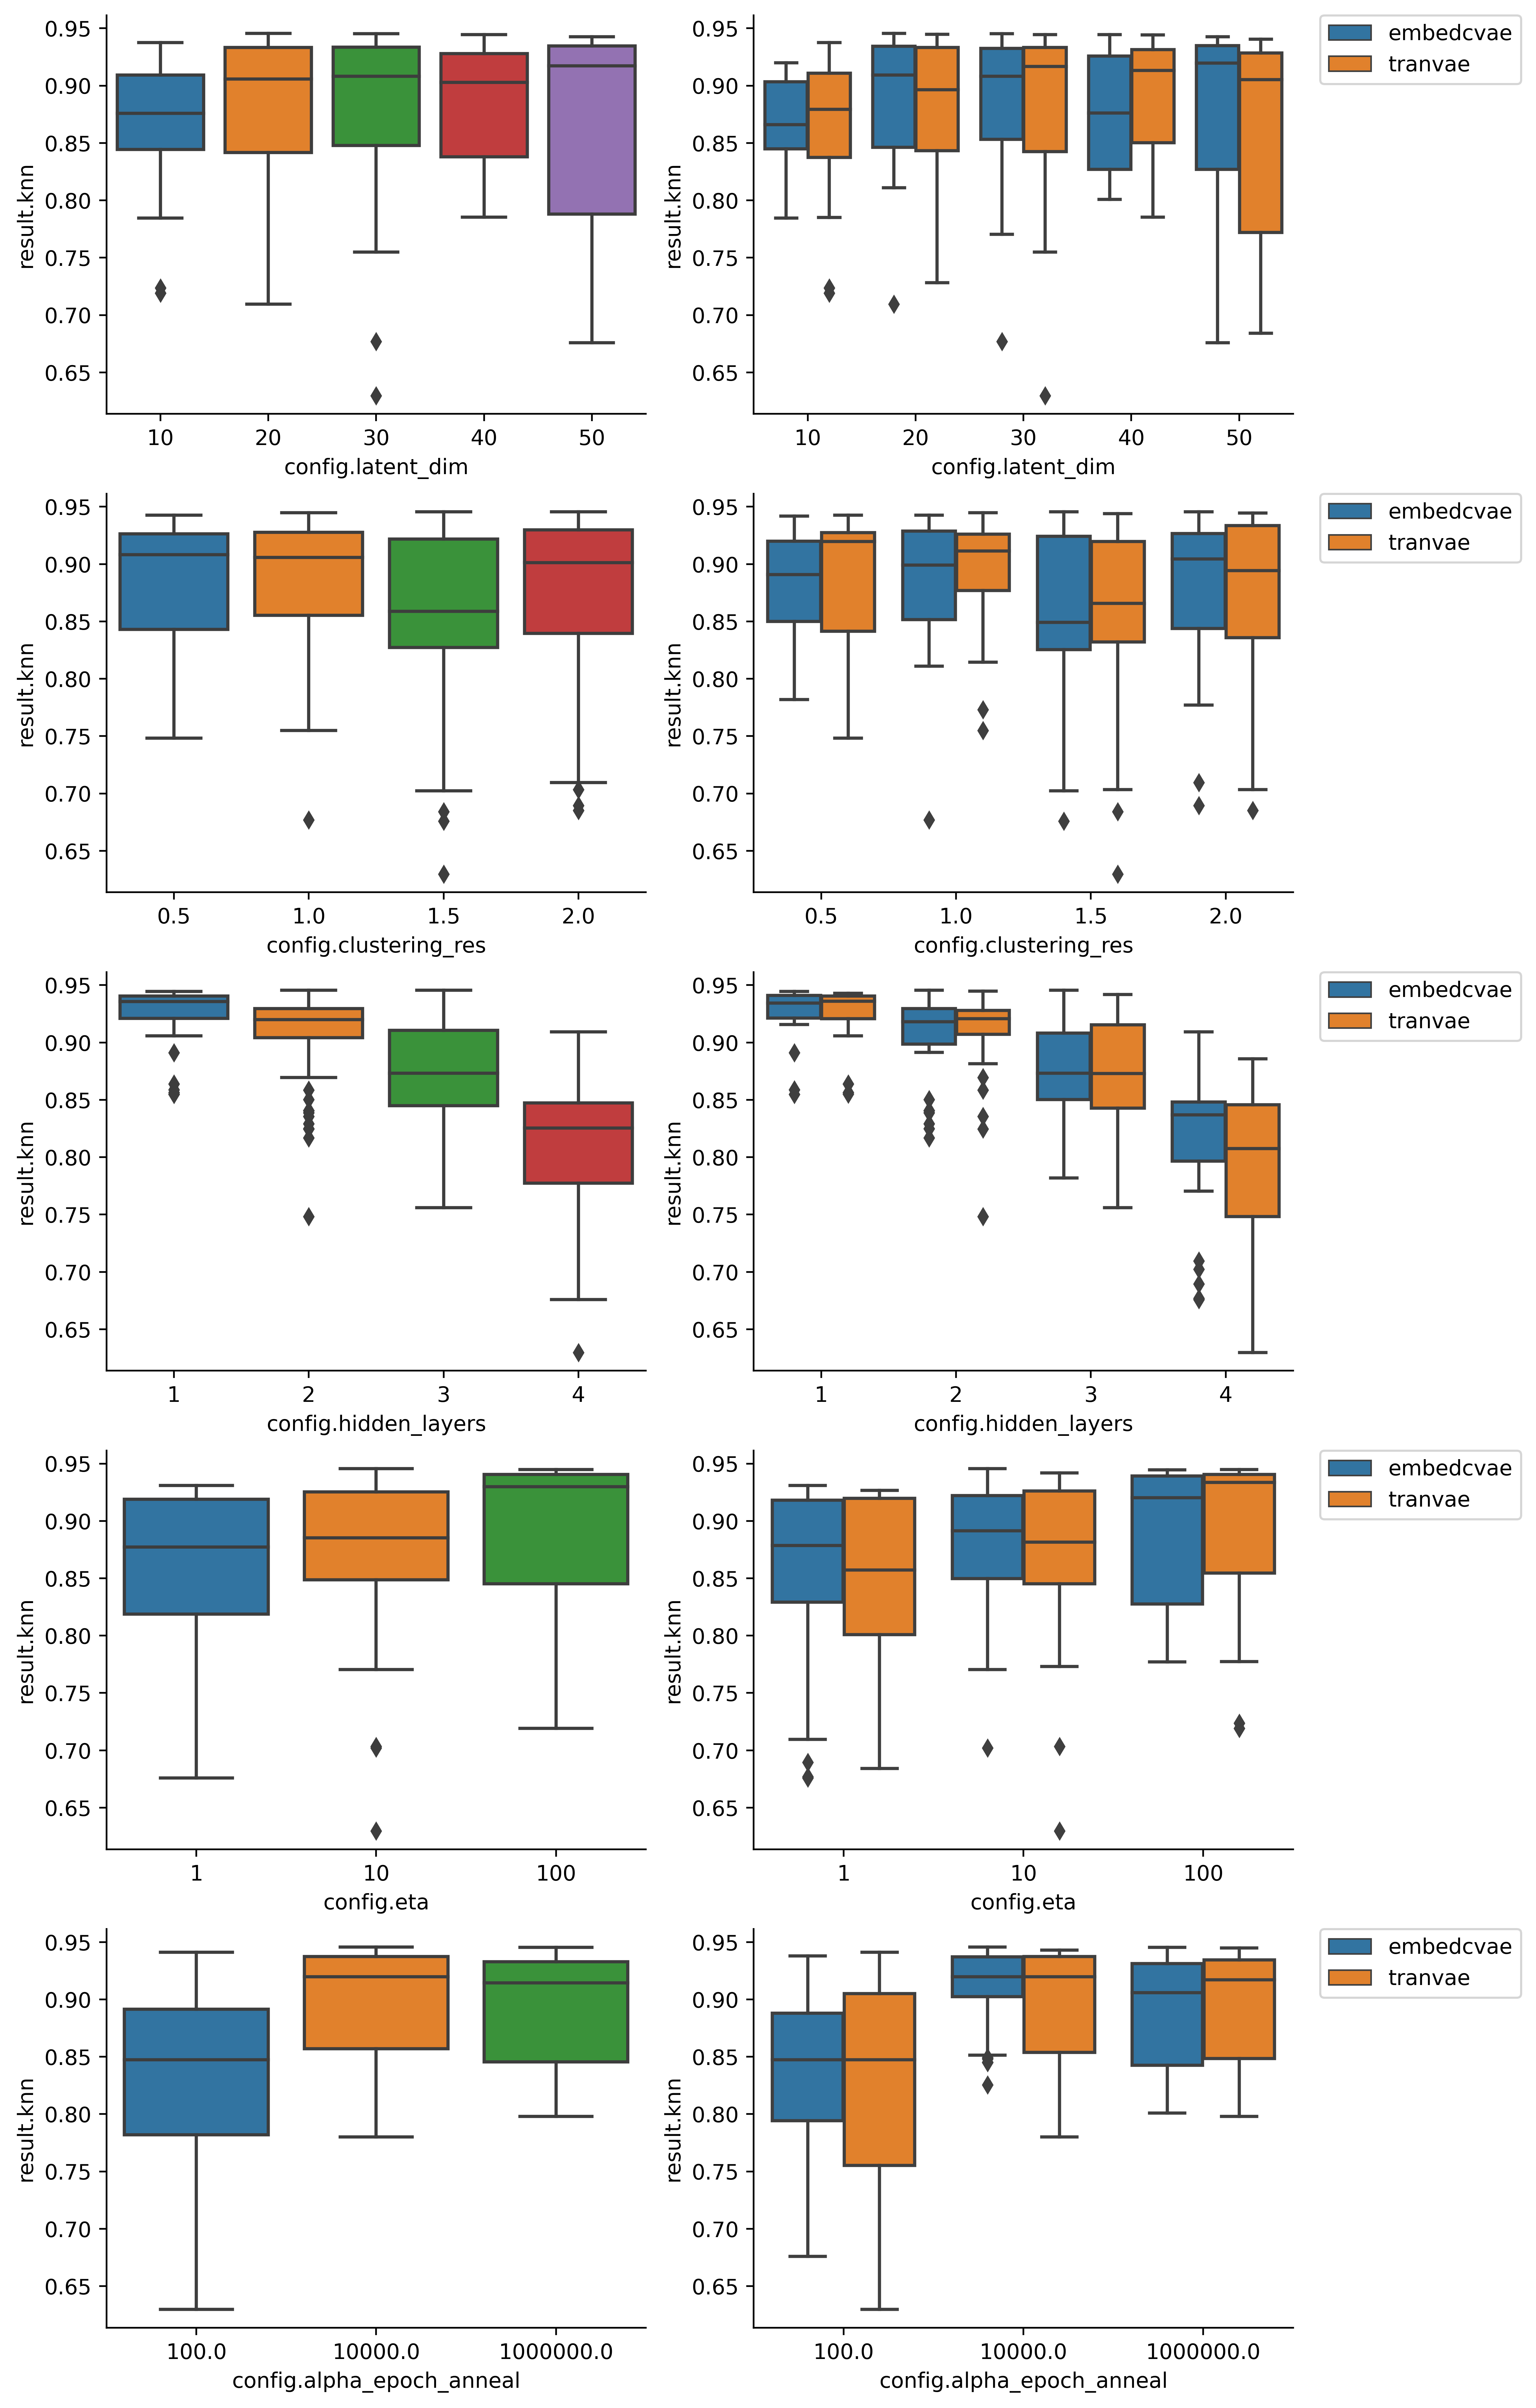

In [17]:
RESULT = 'knn'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.model'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

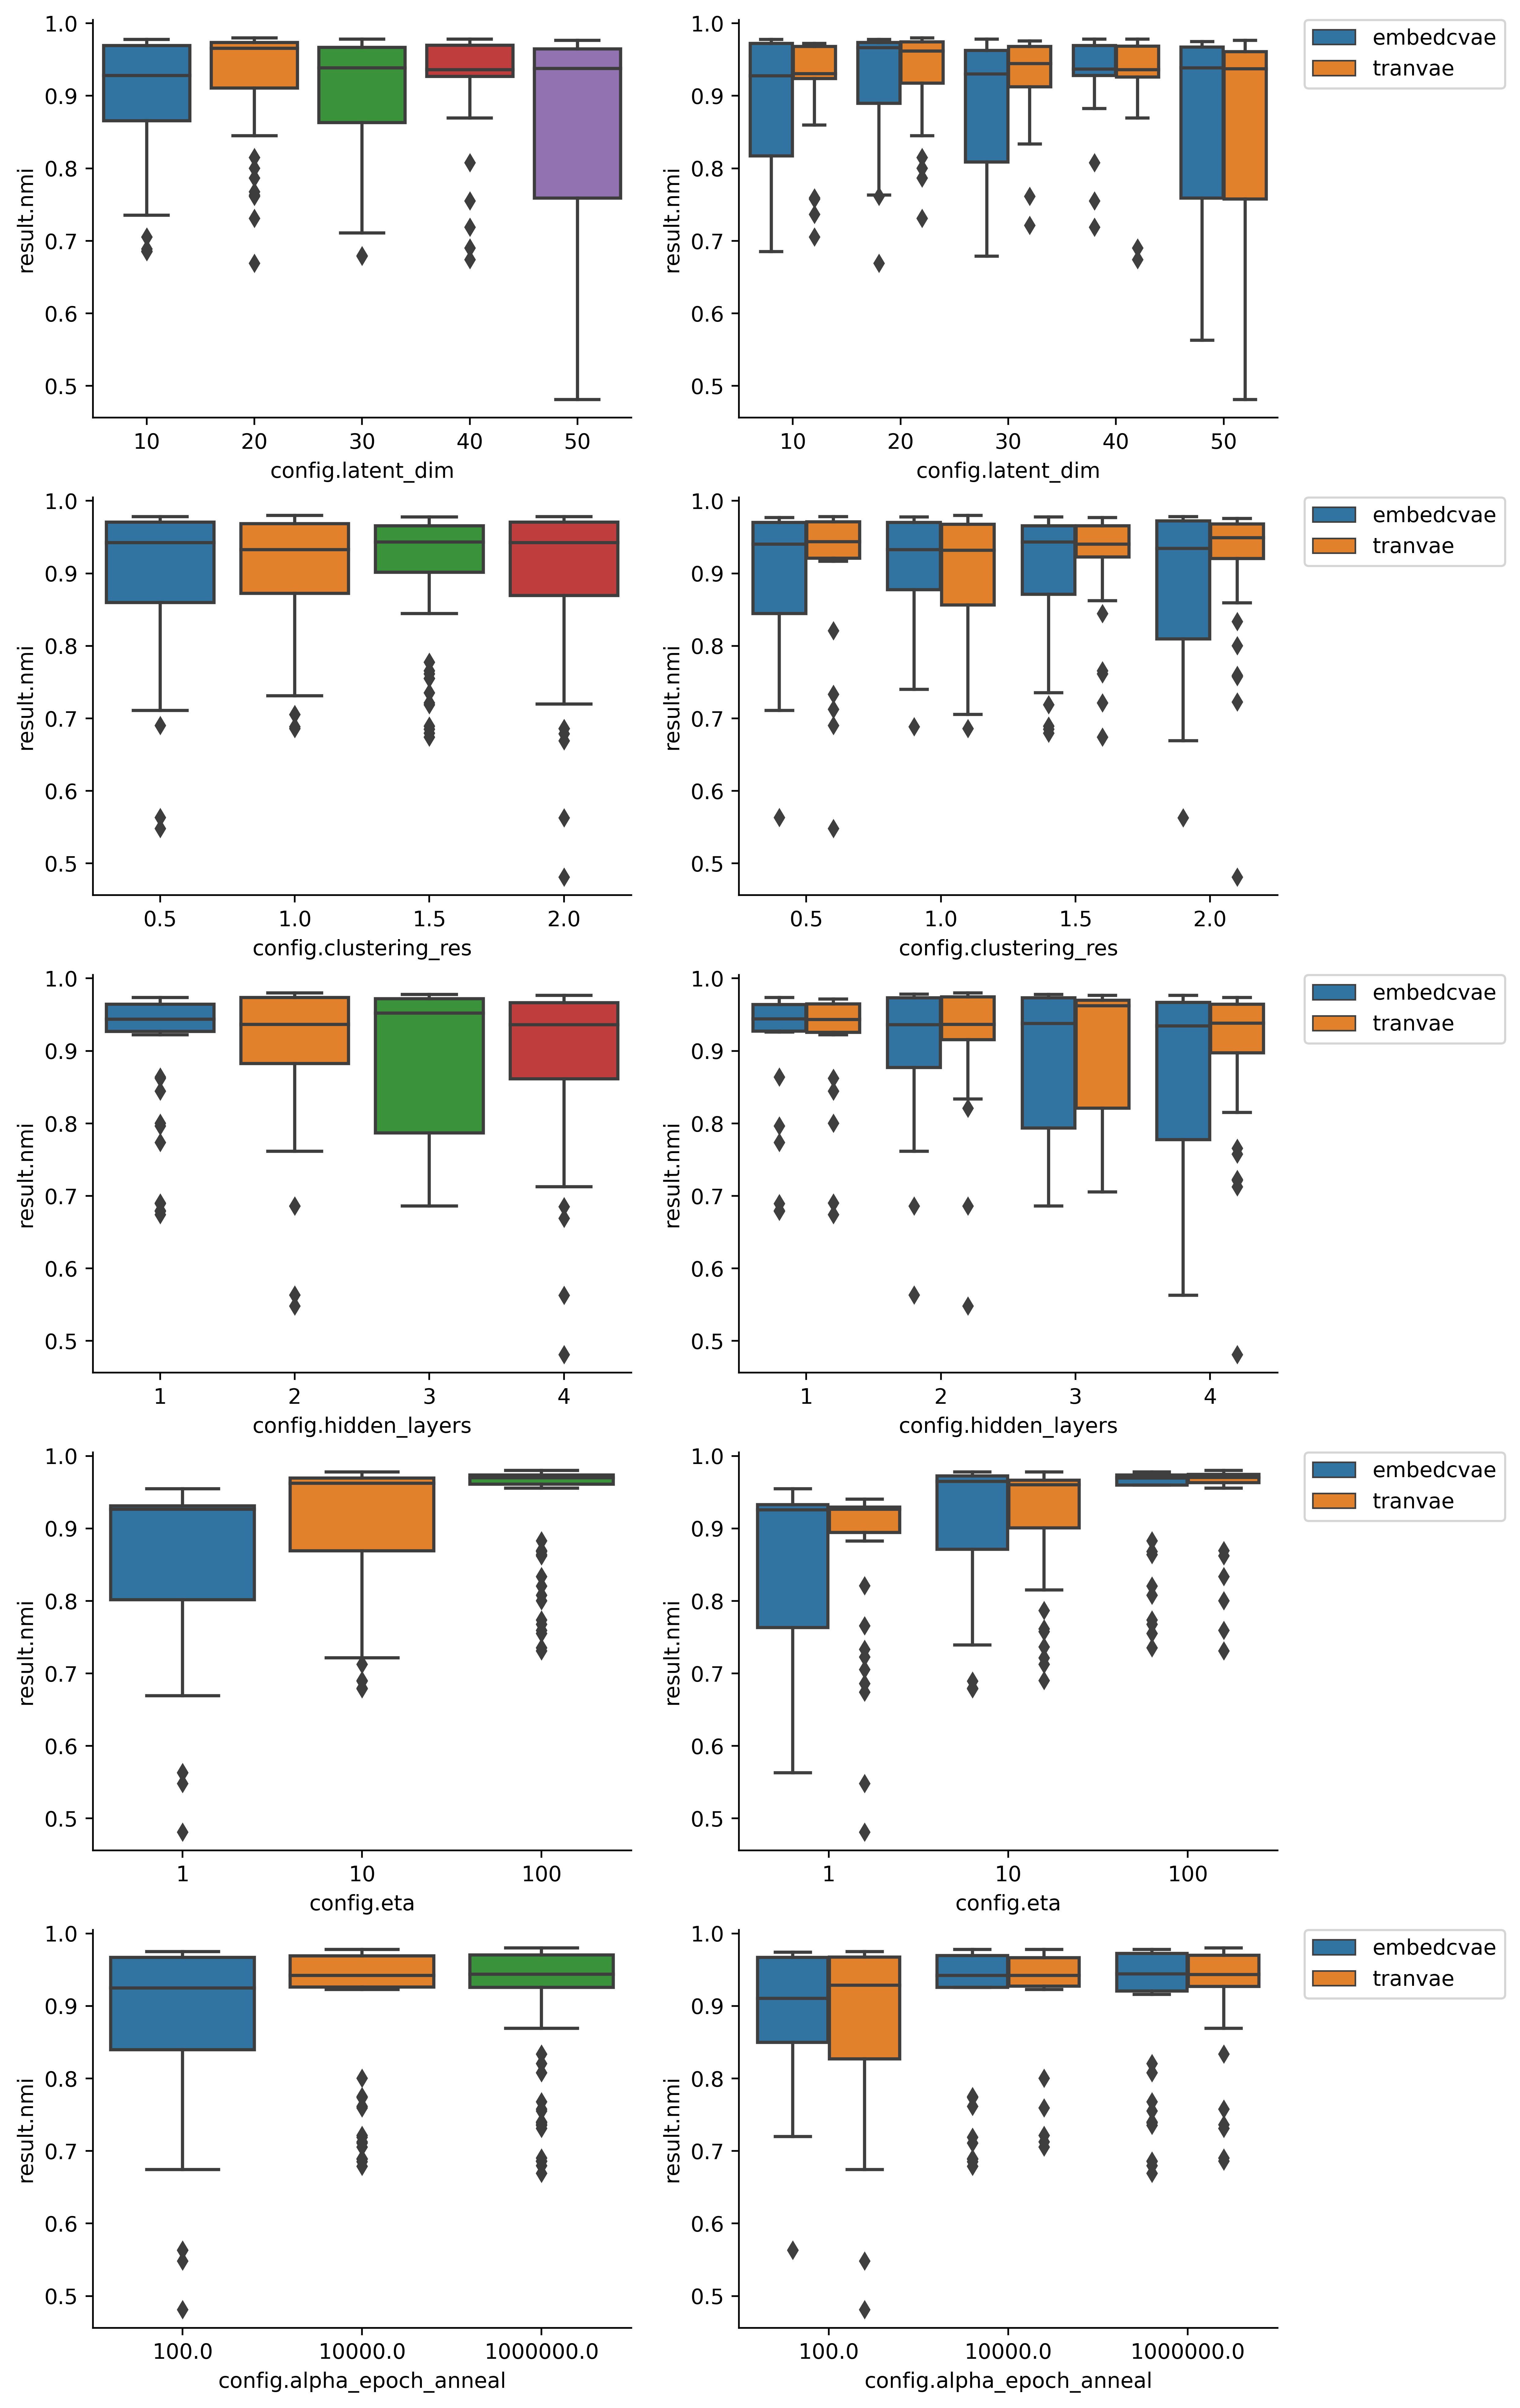

In [18]:
RESULT = 'nmi'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.model'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

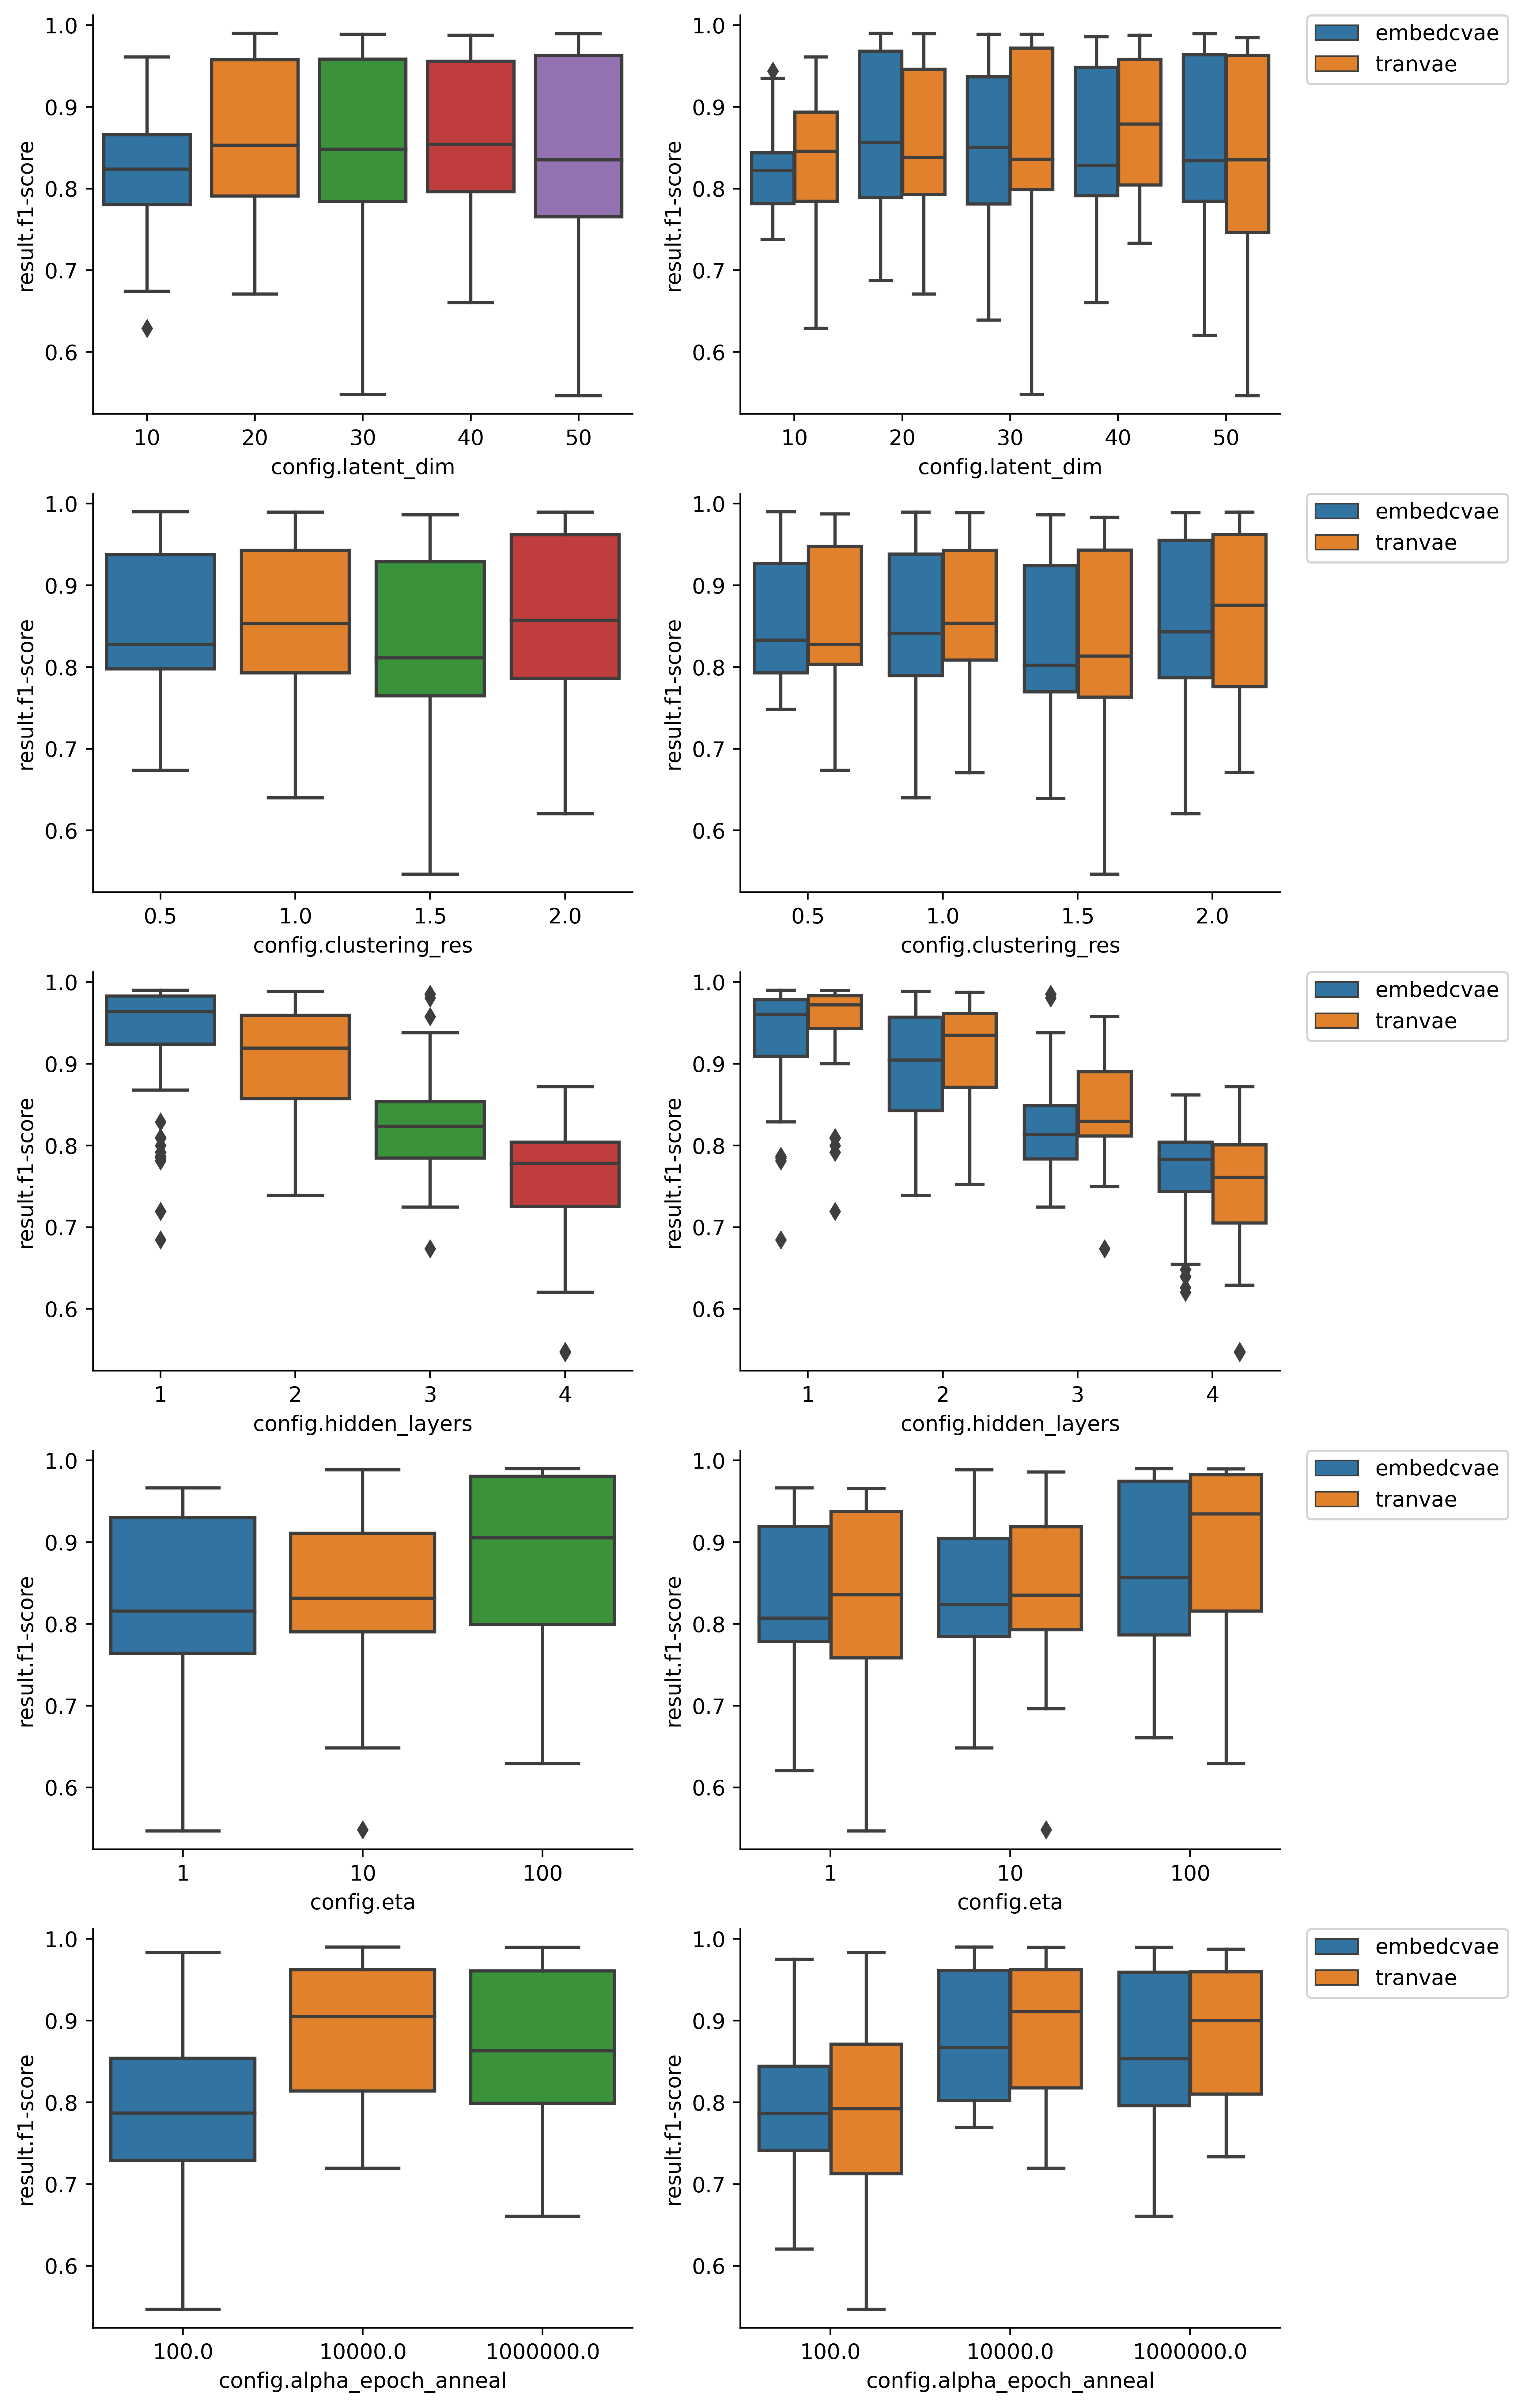

In [20]:
RESULT = 'f1-score'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.model'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [10]:
results = seml.get_results('embedcvae', to_data_frame=True)

  0%|          | 0/728 [00:00<?, ?it/s]

  0%|          | 0/728 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [11]:
results['result.f1-score'] = results['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)

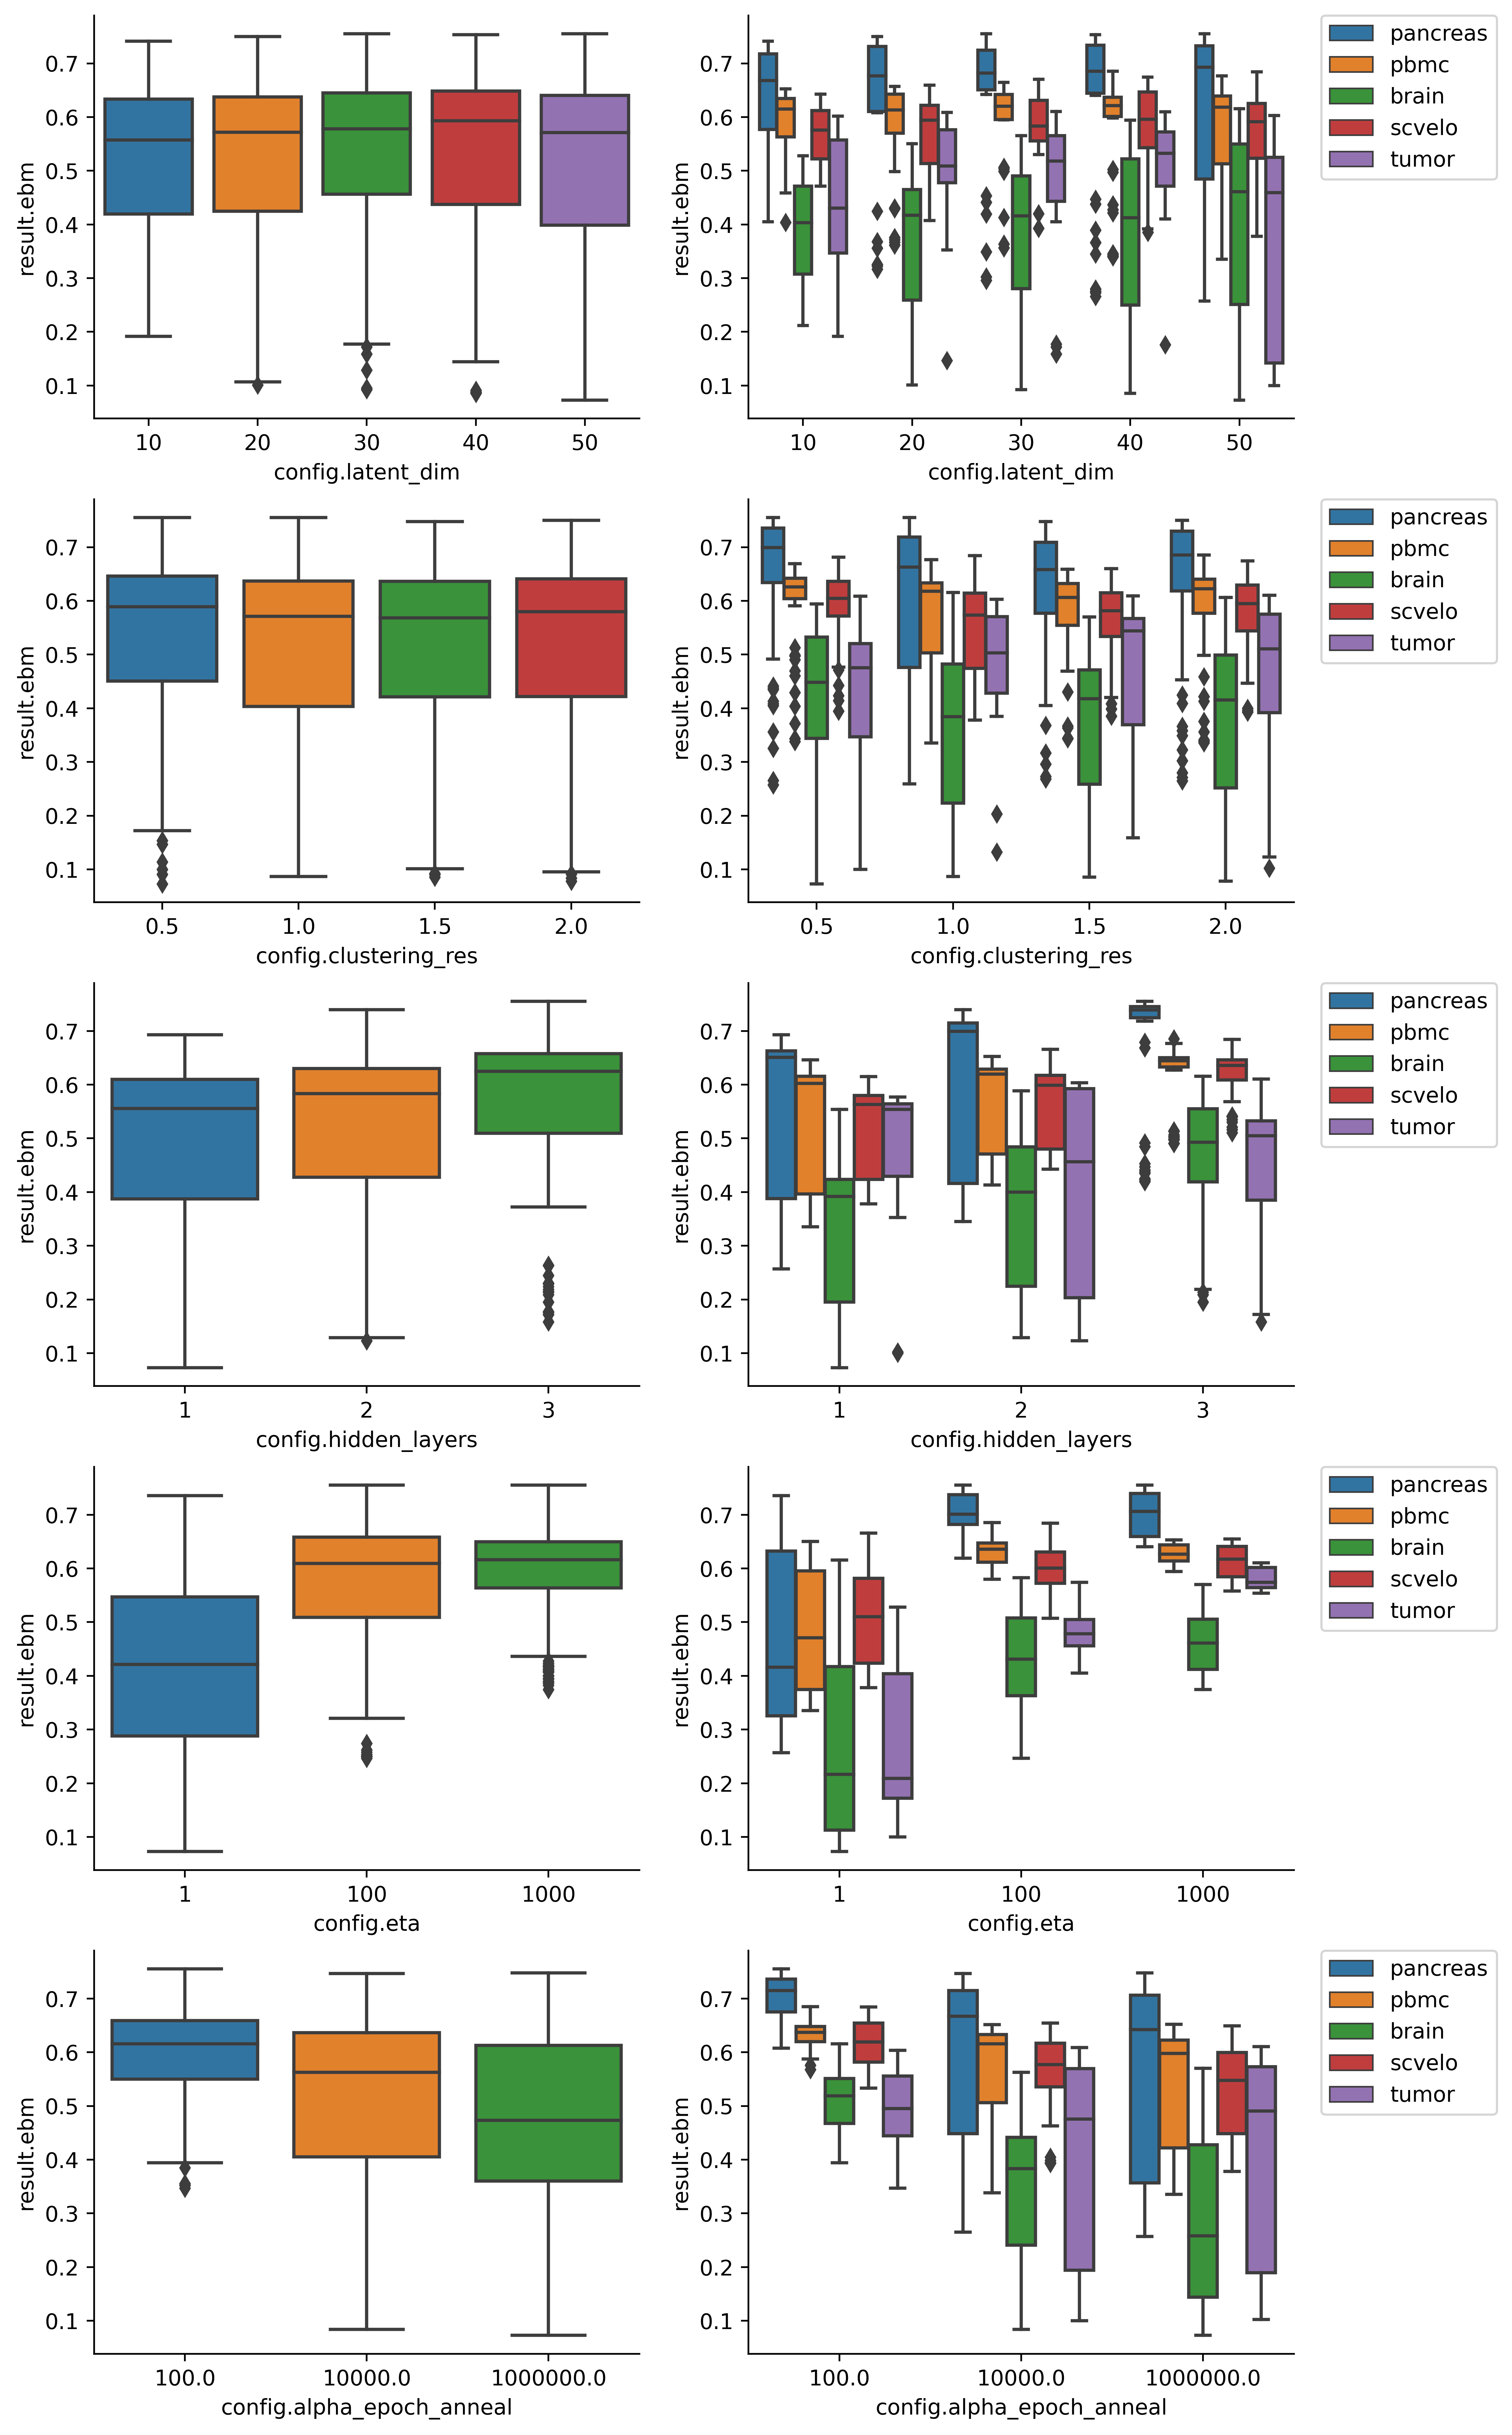

In [12]:
RESULT = 'ebm'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.data'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

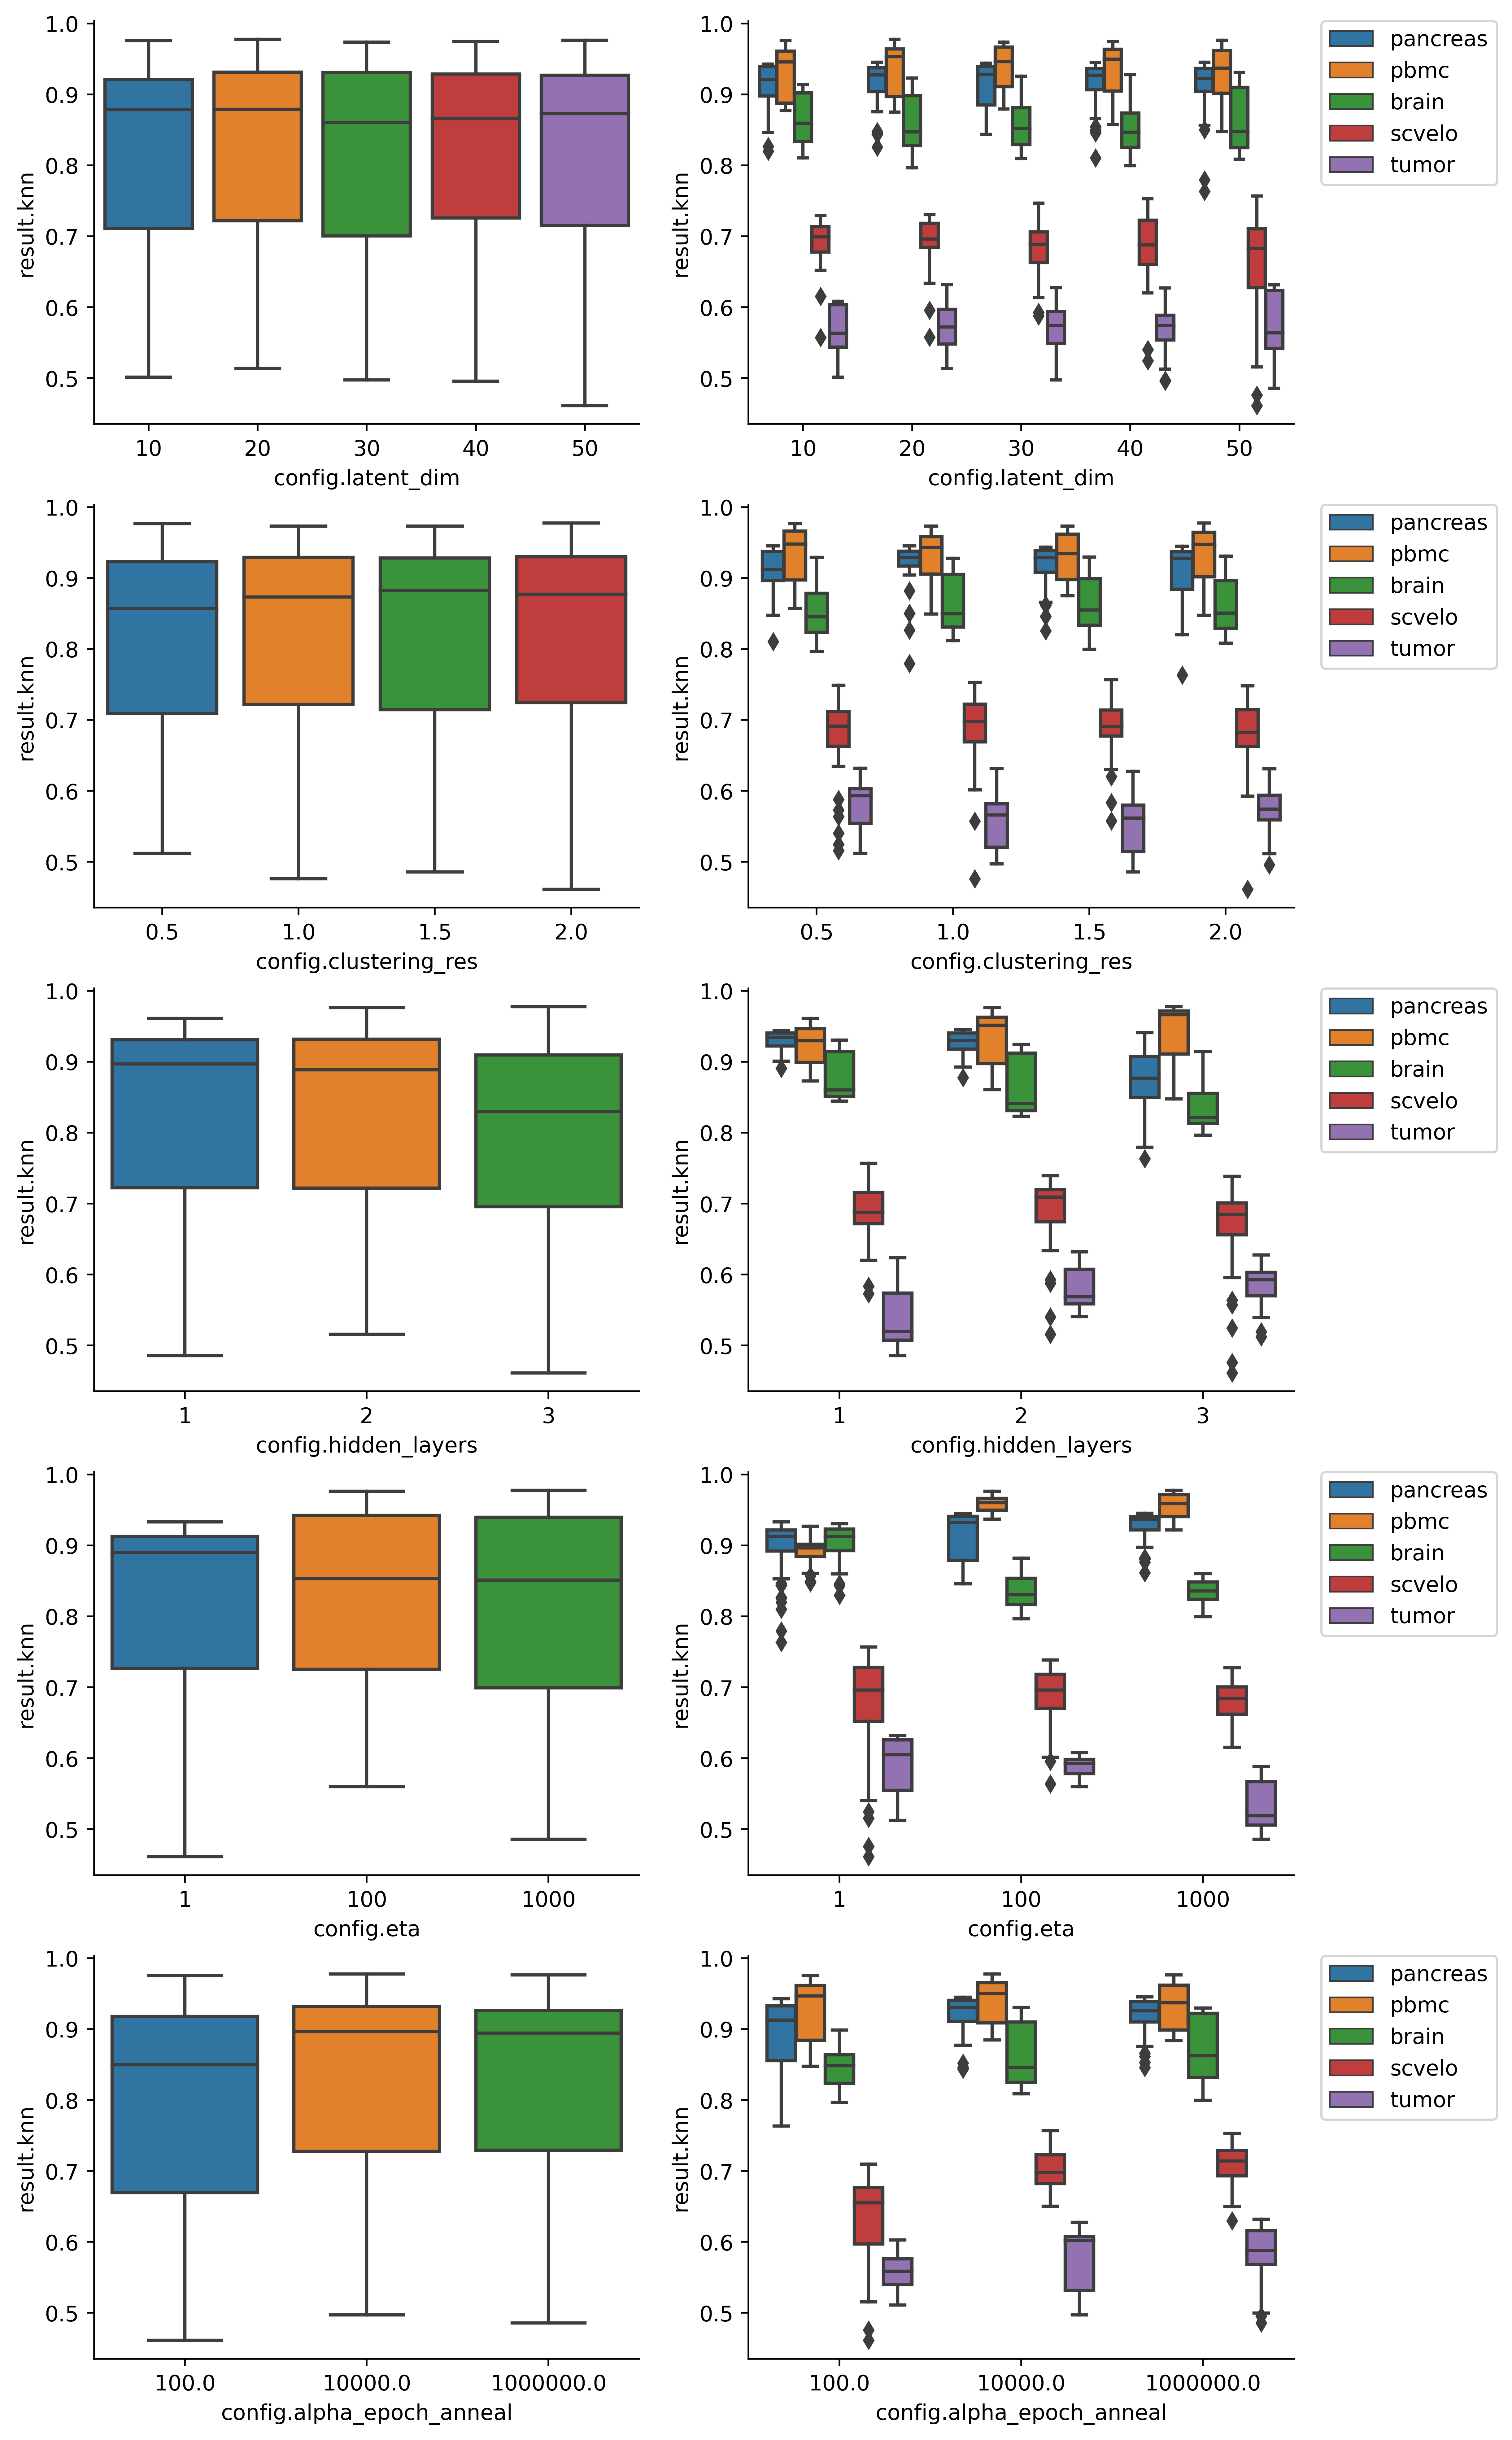

In [13]:
RESULT = 'knn'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.data'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

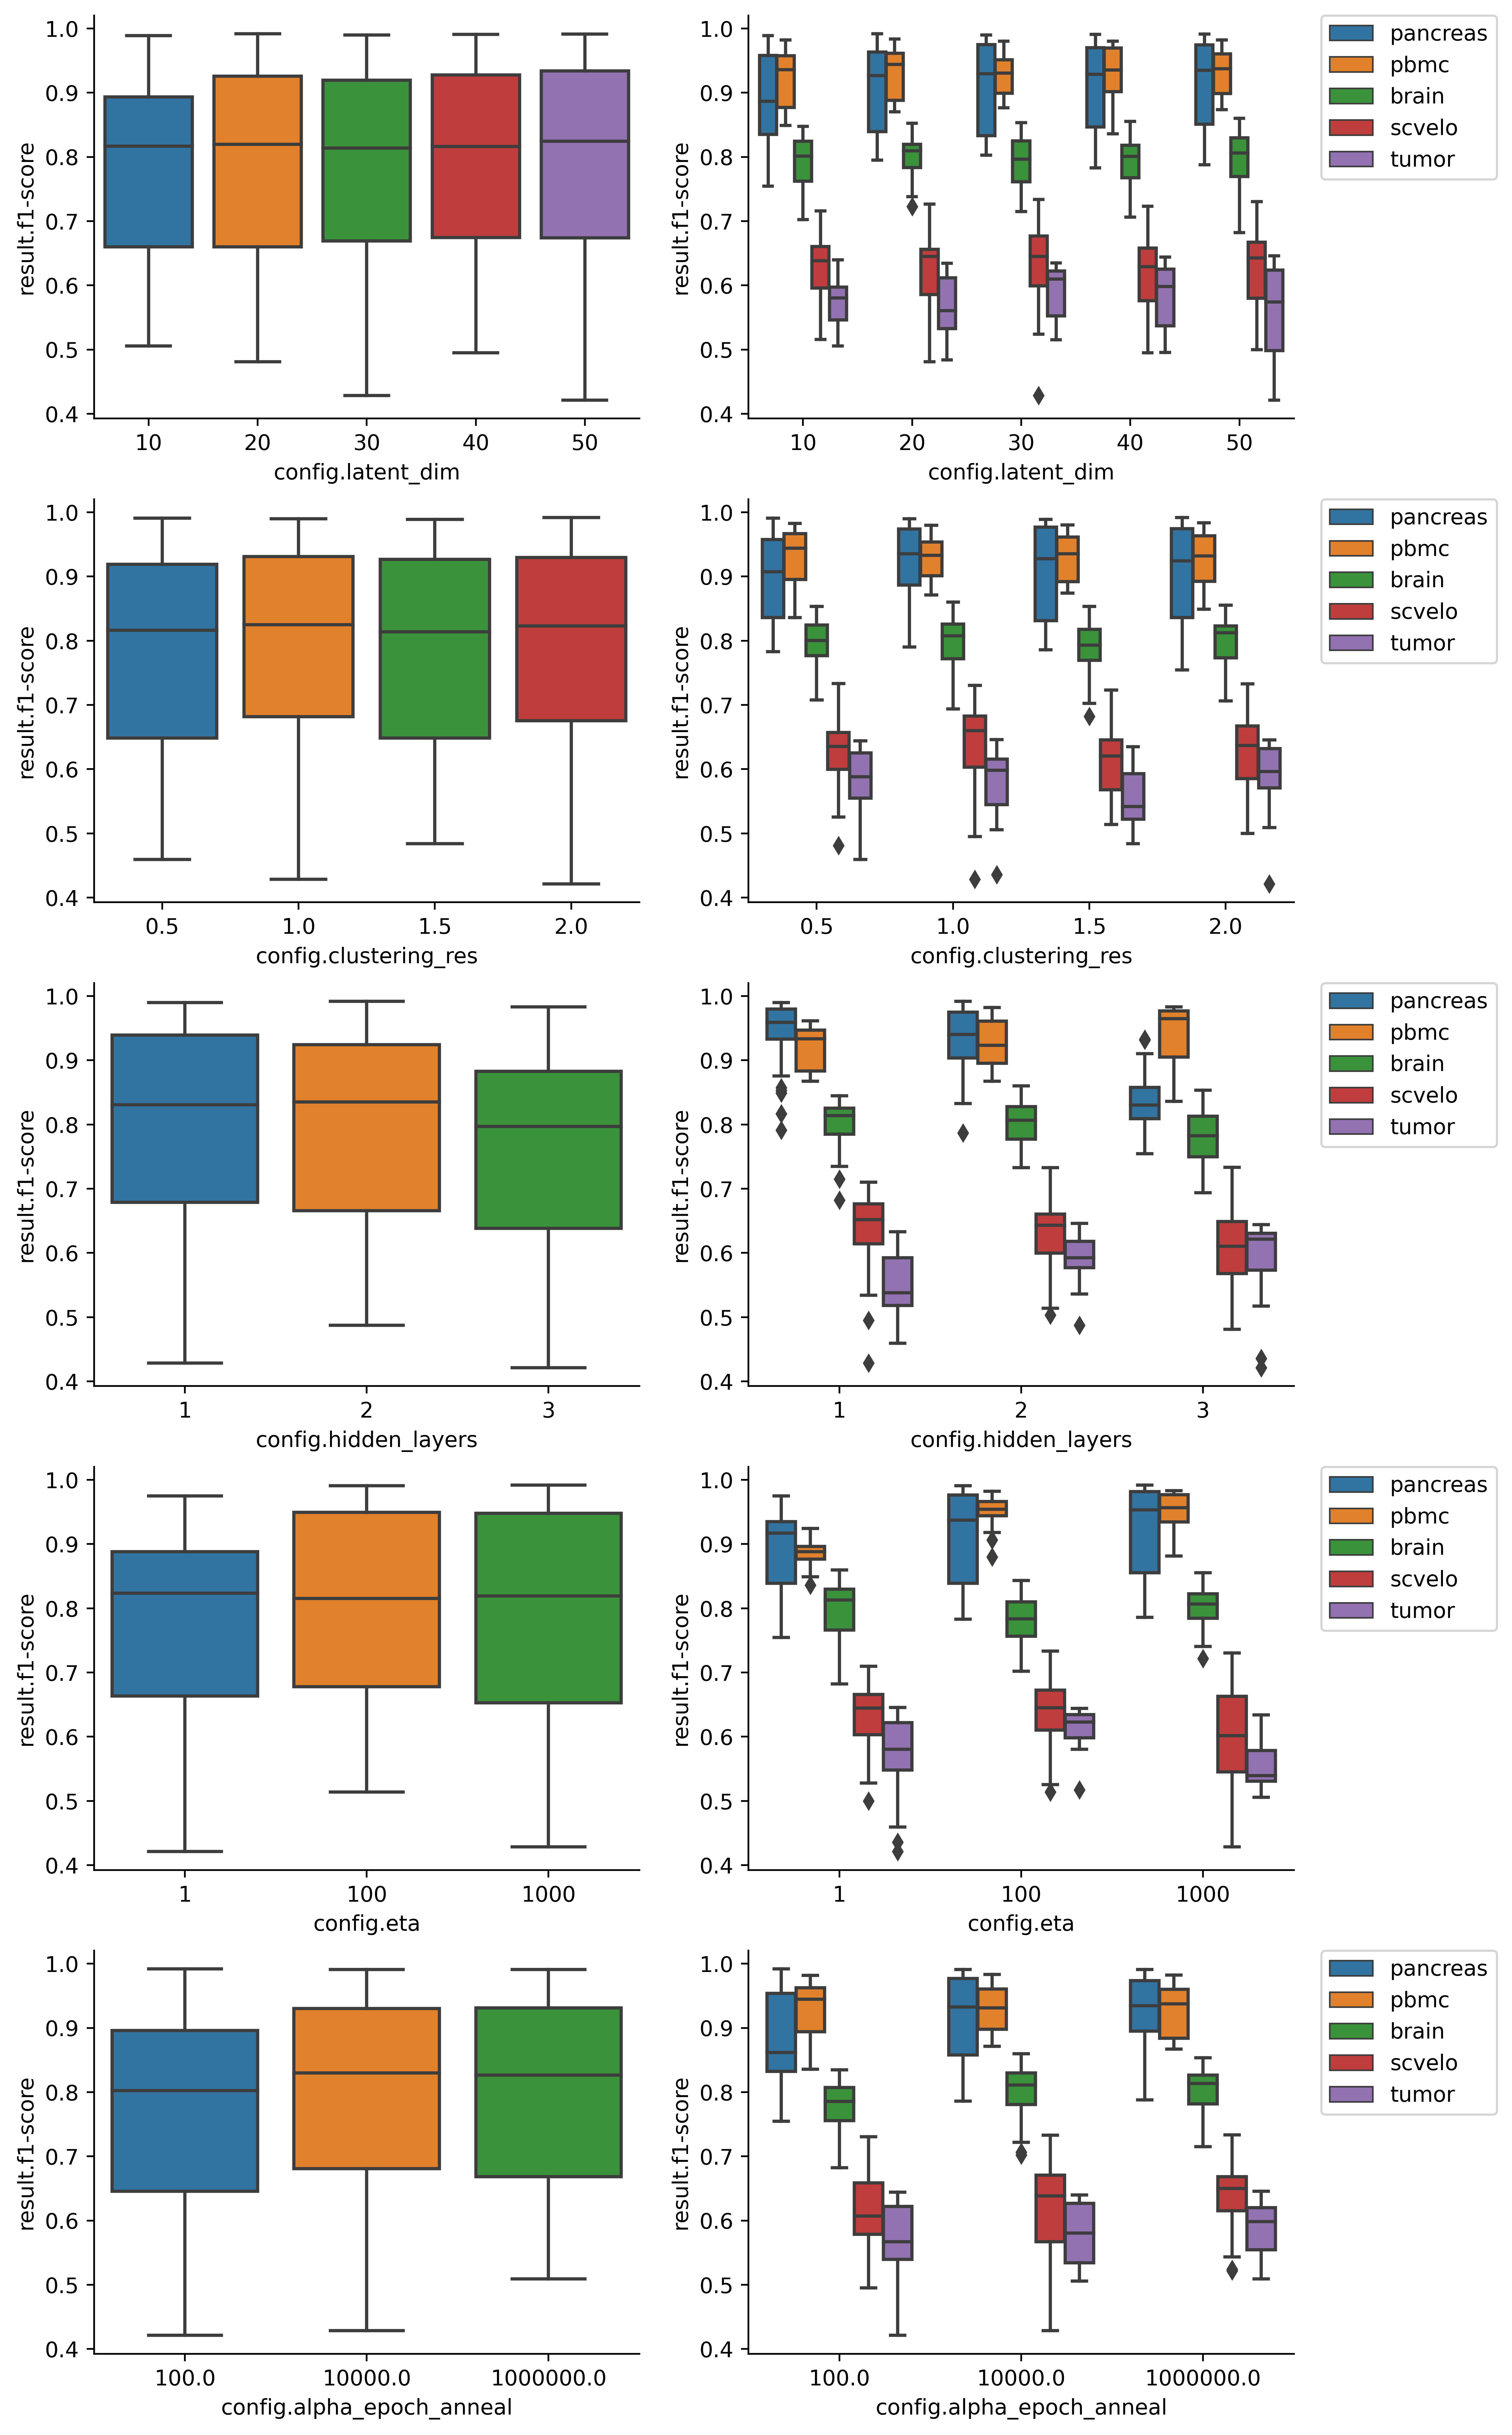

In [14]:
RESULT = 'f1-score'
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i, hyperparam in enumerate(['latent_dim', 
                                'clustering_res',
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        #hue=results['config.data'],
        ax=ax[i, 0]
    )
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.data'],
        ax=ax[i, 1]
    )
    ax[i, 1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

In [17]:
results_embedcvae = seml.get_results('embedcvae', to_data_frame=True)
results_tranvae = seml.get_results('tranvae', to_data_frame=True)
results = pd.concat([results_embedcvae, results_tranvae])
results['result.f1-score'] = results['result.classification_report'].apply(
    lambda x: x.loc['macro avg']['f1-score']
)

  0%|          | 0/728 [00:00<?, ?it/s]

  0%|          | 0/728 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


  0%|          | 0/1013 [00:00<?, ?it/s]

  0%|          | 0/1013 [00:00<?, ?it/s]

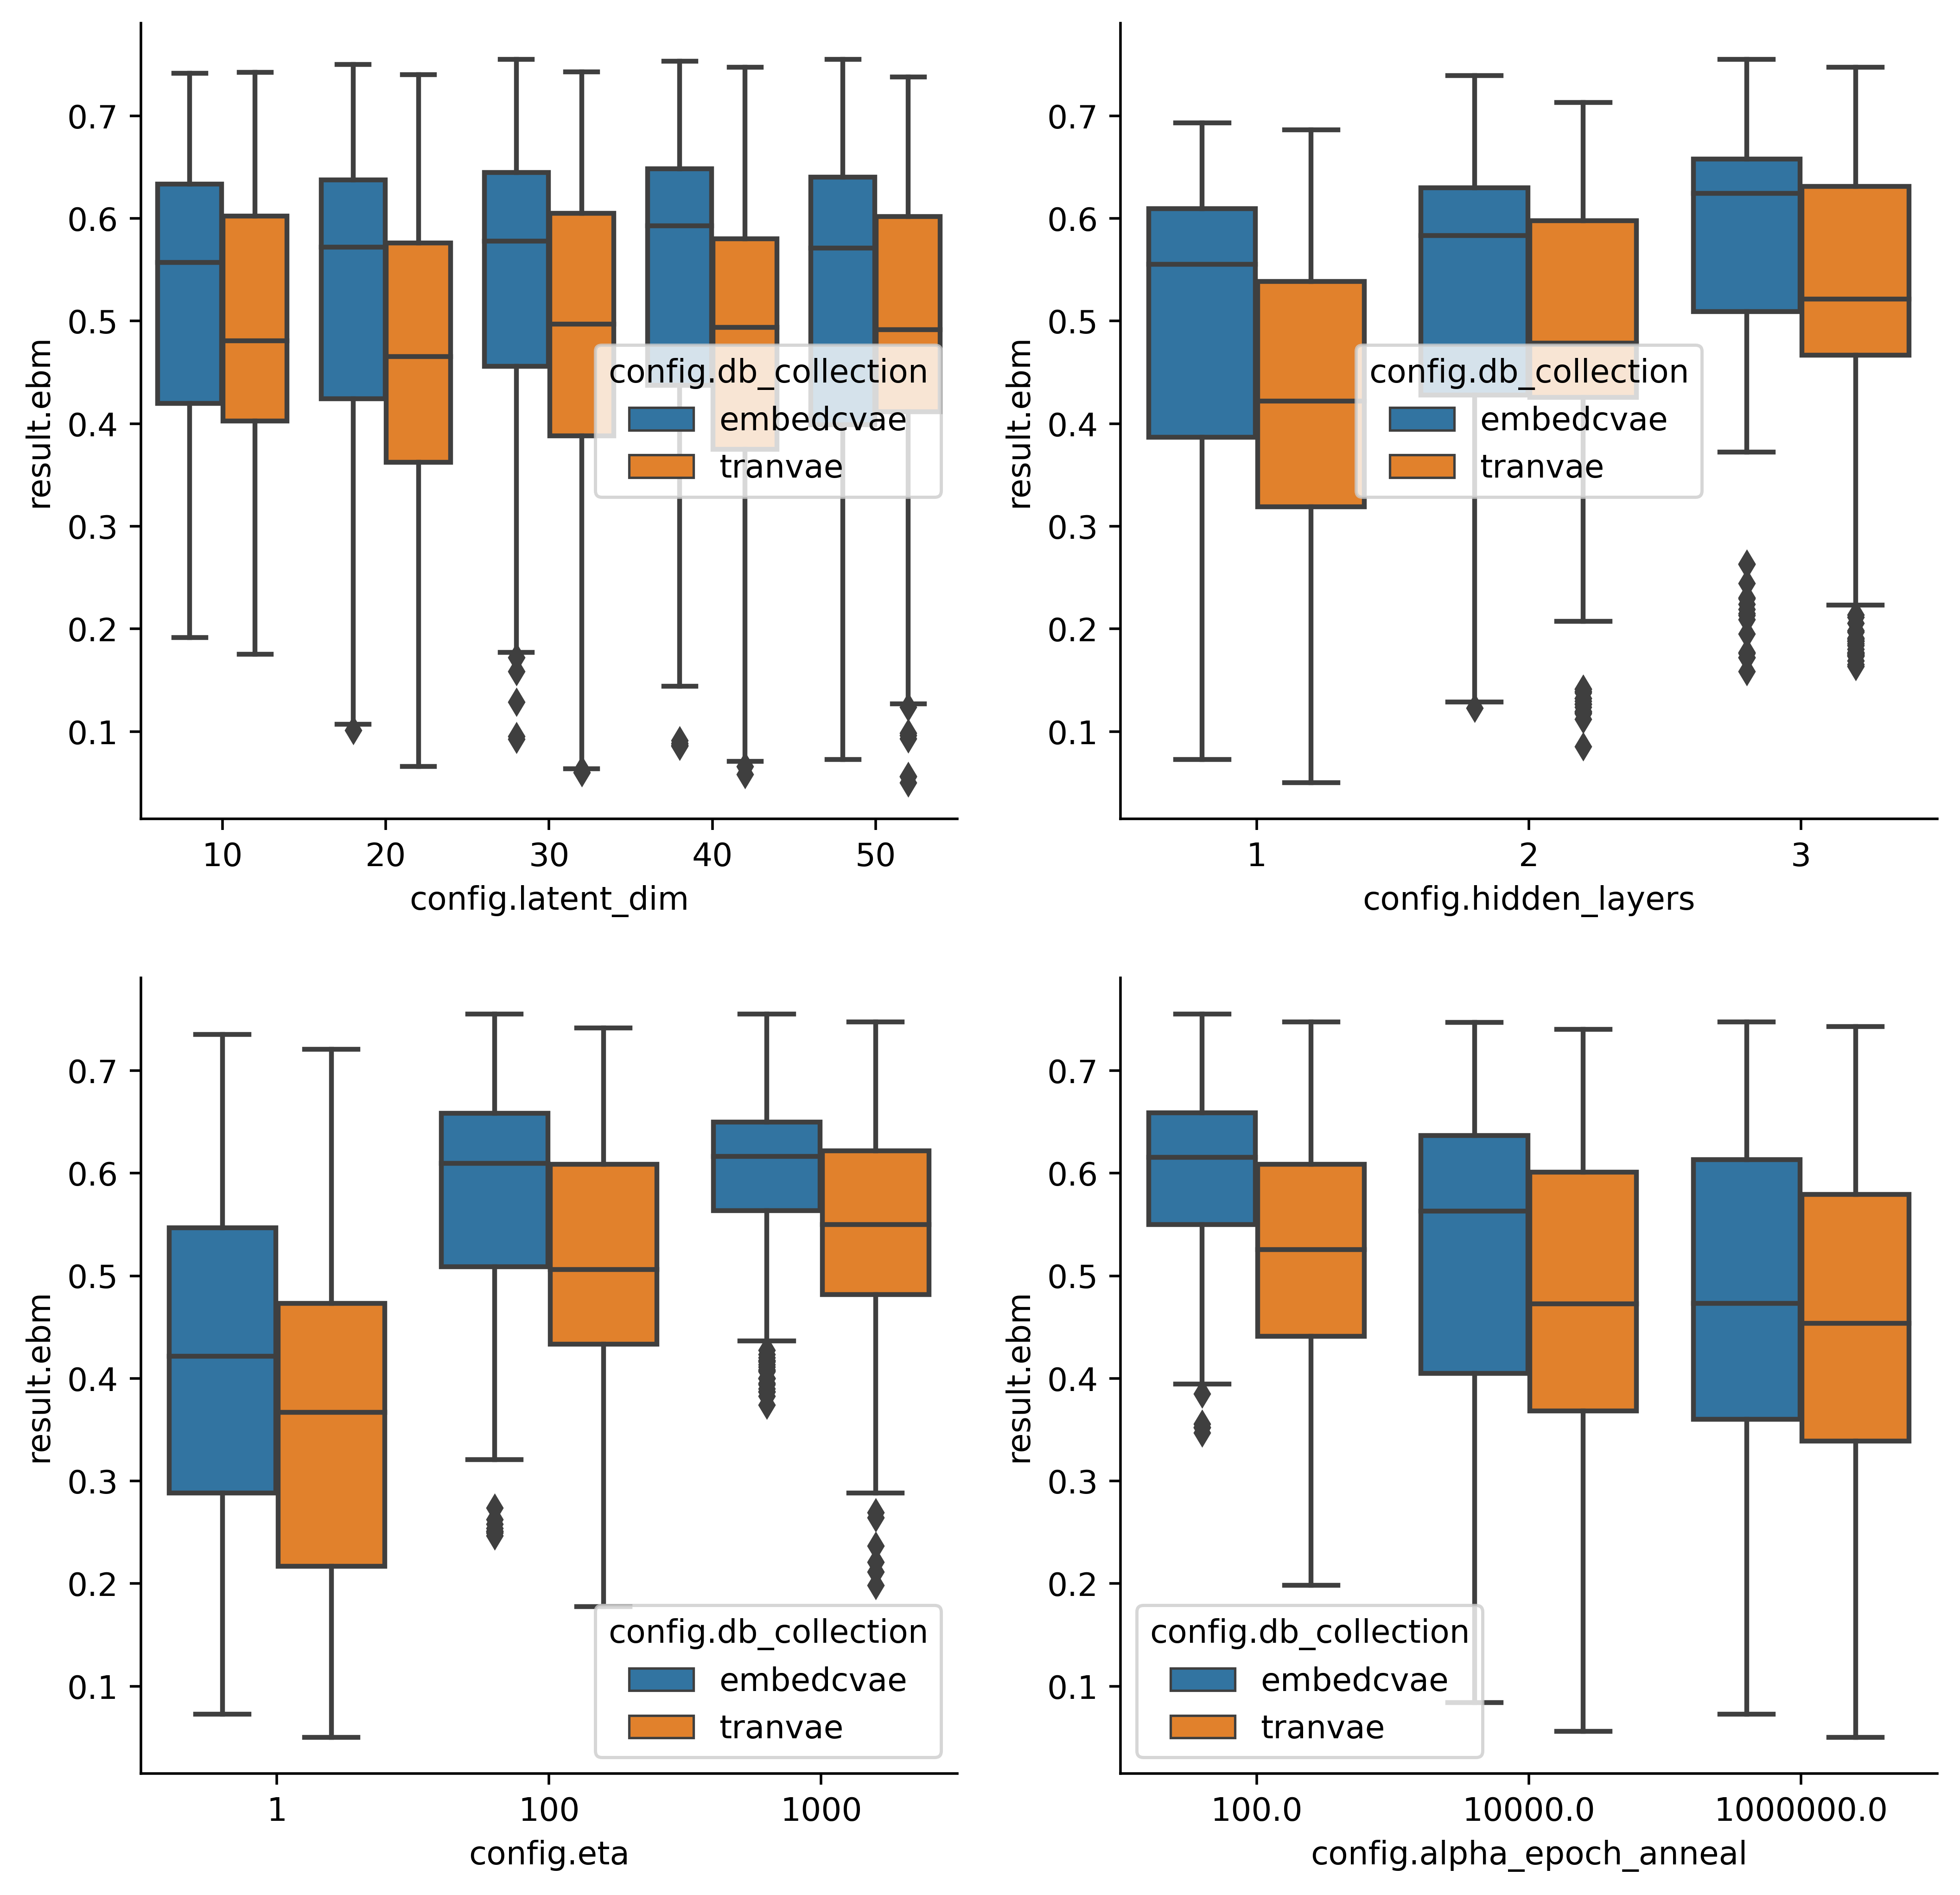

In [18]:
RESULT = 'ebm'
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for i, hyperparam in enumerate(['latent_dim', 
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.db_collection'],
        ax=ax[i]
    )
sns.despine()

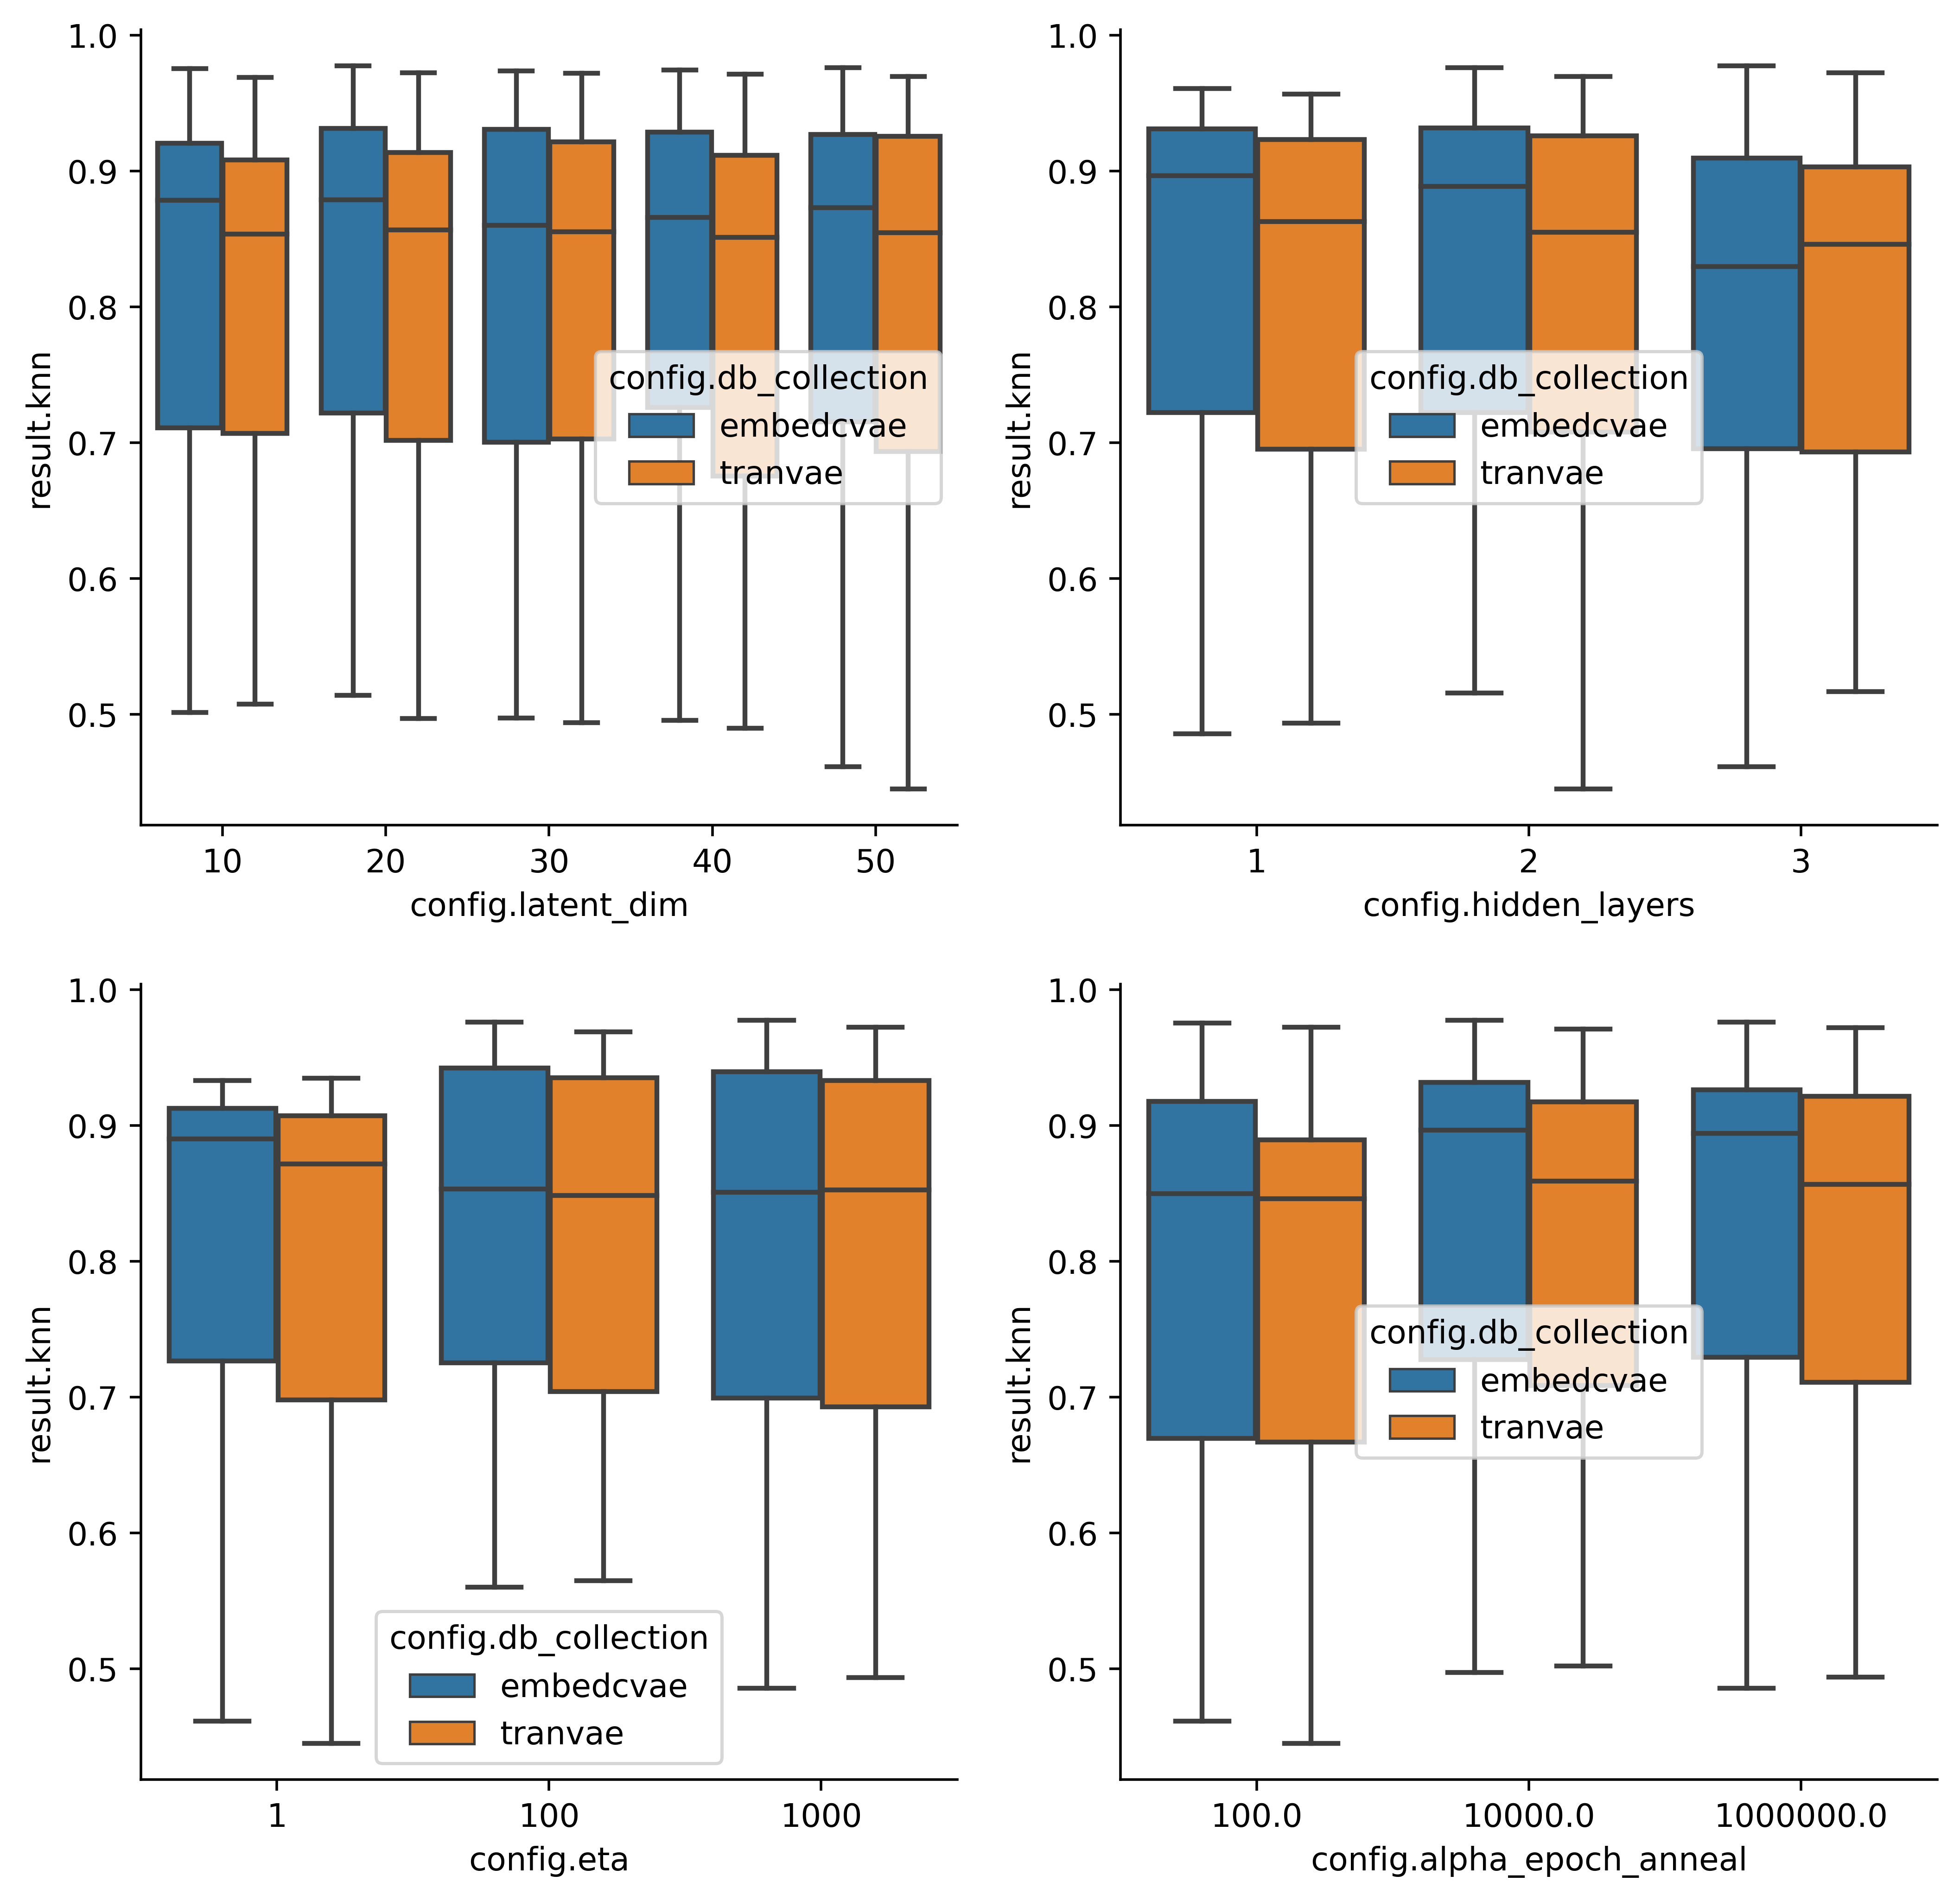

In [19]:
RESULT = 'knn'
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for i, hyperparam in enumerate(['latent_dim', 
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.db_collection'],
        ax=ax[i]
    )
sns.despine()

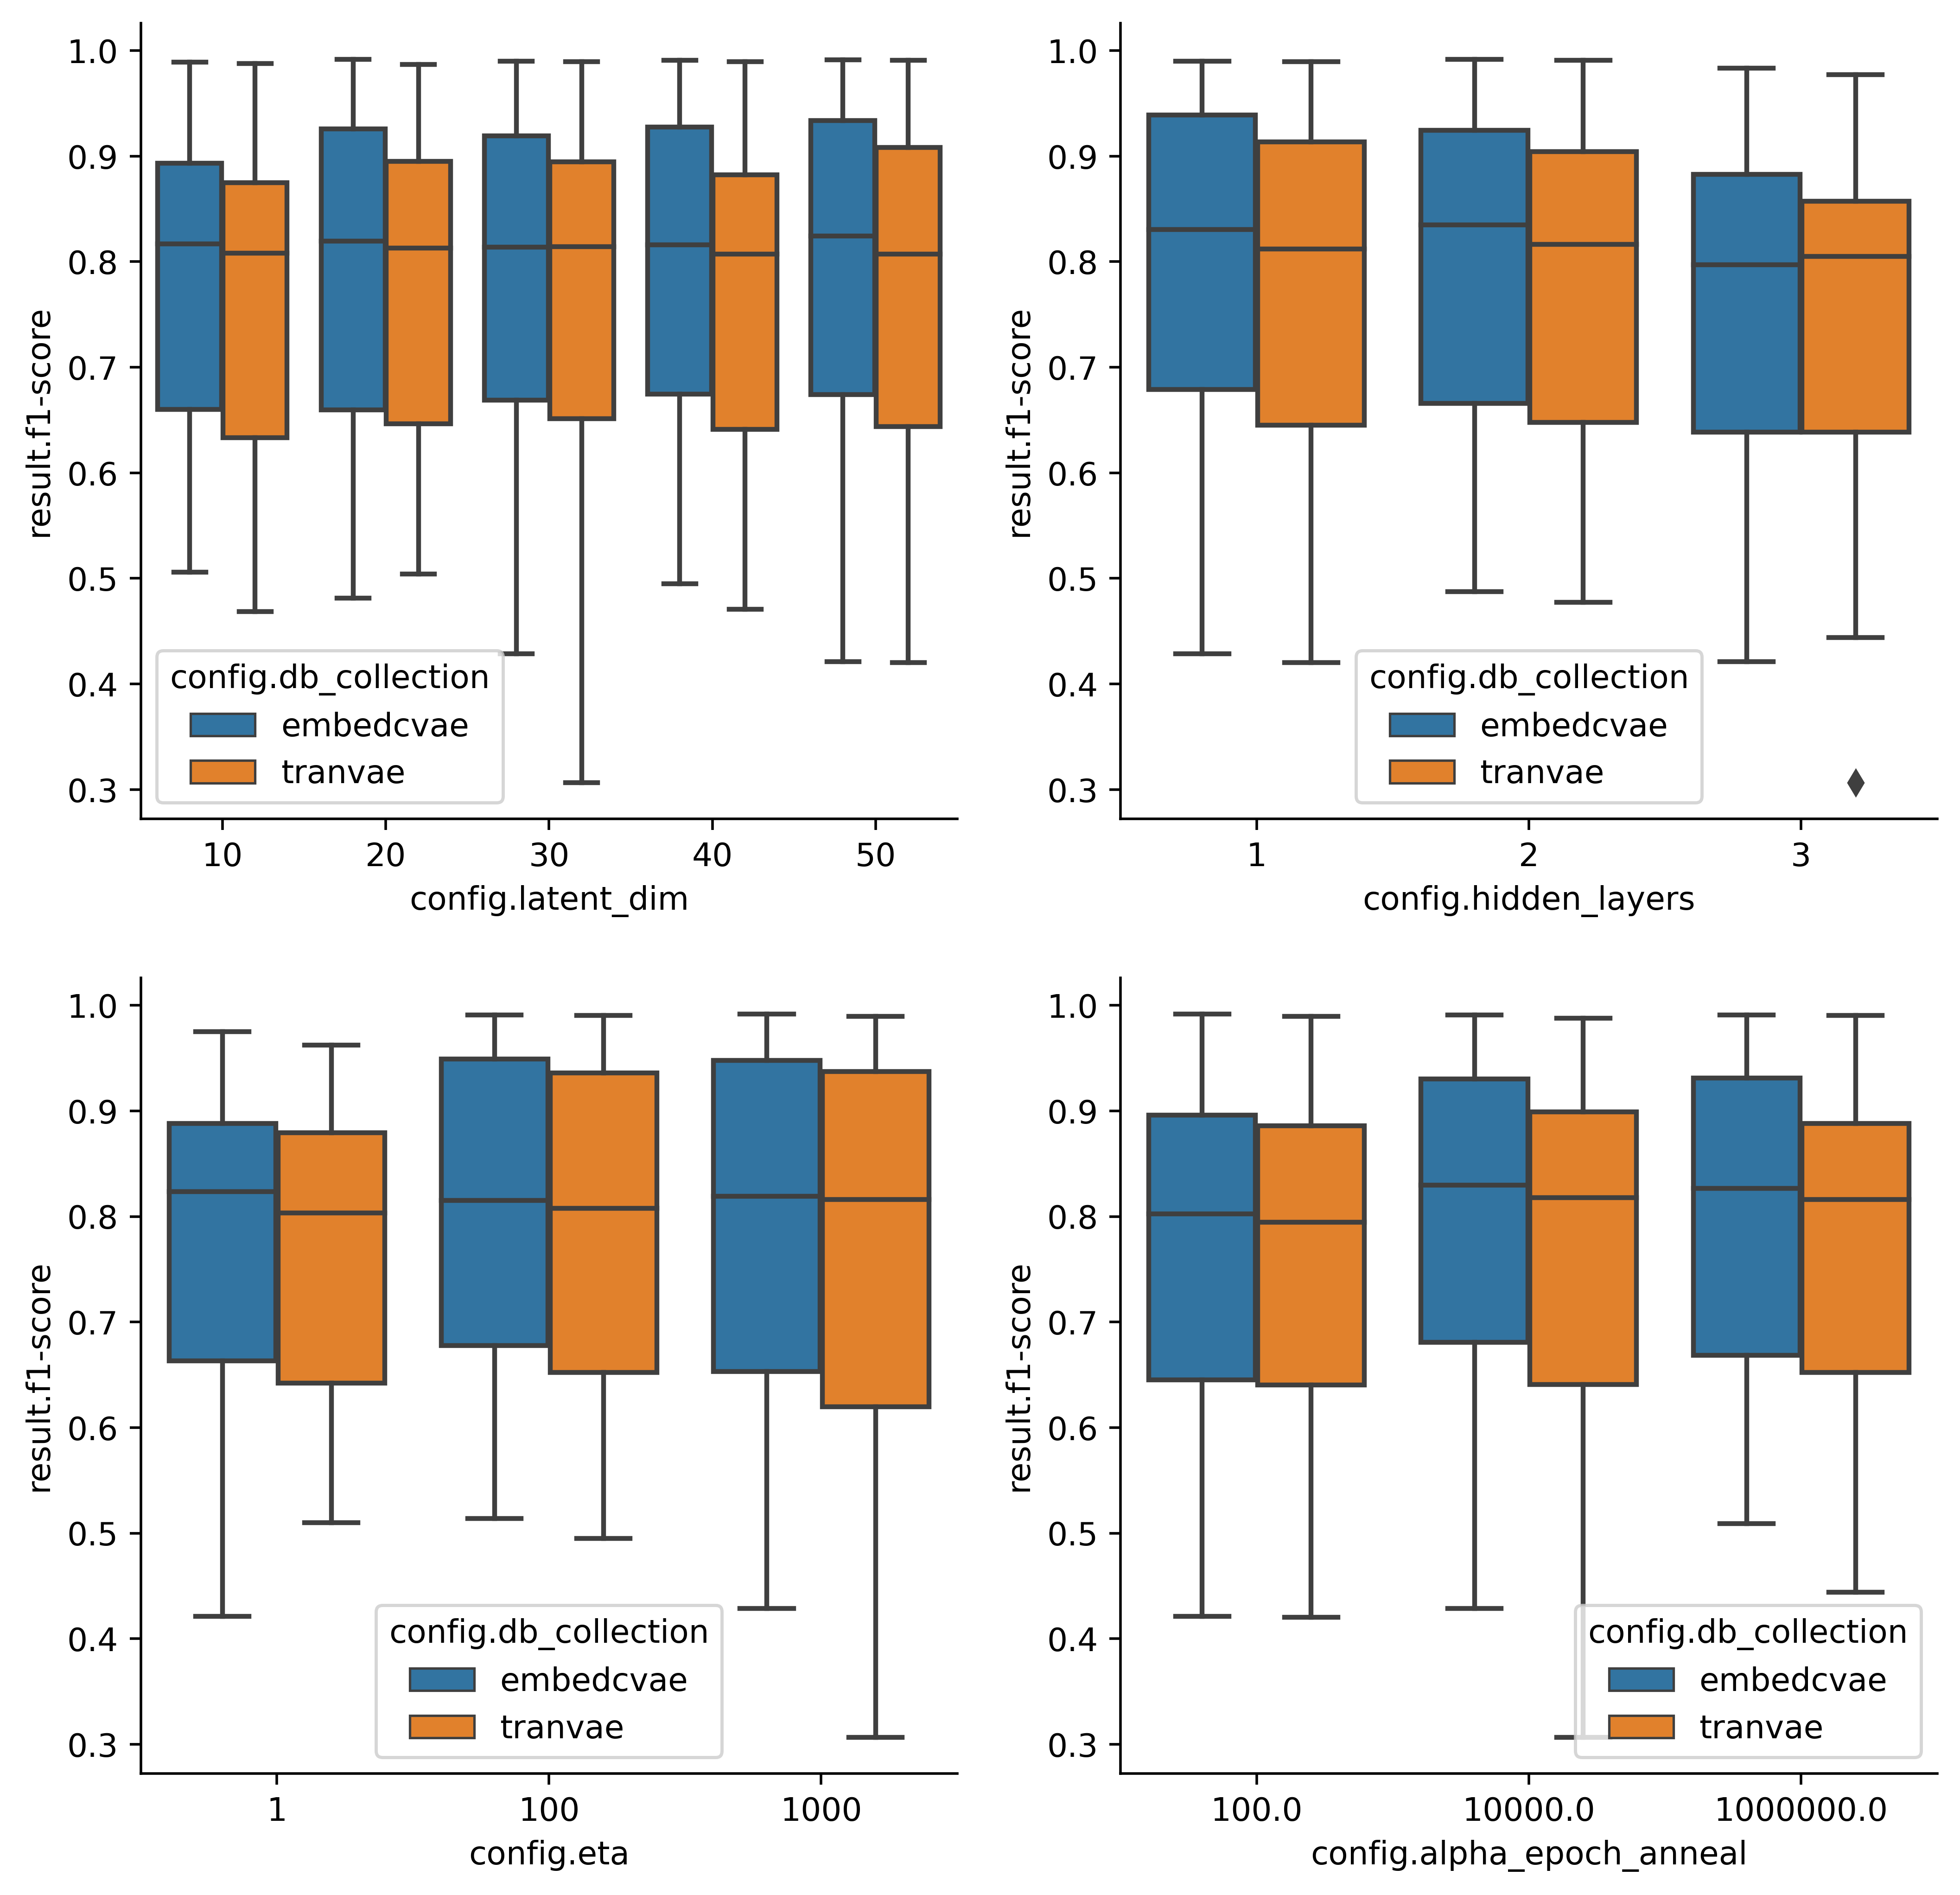

In [20]:
RESULT = 'f1-score'
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
for i, hyperparam in enumerate(['latent_dim', 
                                'hidden_layers', 
                                'eta',
                                'alpha_epoch_anneal']):
    sns.boxplot(
        x=results[f'config.{hyperparam}'], 
        y=results[f'result.{RESULT}'],
        hue=results['config.db_collection'],
        ax=ax[i]
    )
sns.despine()

In [21]:
results.sort_values('result.ebm').groupby('config.data').last()

_id  config.overwrite config.db_collection  \
config.data                                               
brain        341               341            embedcvae   
lung         969               969              tranvae   
pancreas     103               103            embedcvae   
pbmc         236               236            embedcvae   
scvelo       676               676            embedcvae   
tumor        836               836              tranvae   

             config.alpha_epoch_anneal  config.clustering_res  config.eta  \
config.data                                                                 
brain                            100.0                    1.0           1   
lung                             100.0                    1.0           1   
pancreas                         100.0                    0.5         100   
pbmc                             100.0                    2.0         100   
scvelo                           100.0                    1.0         100   
tumor                        1000000.0                    0.5        1000   

             config.hidden_layers  config.latent_dim config.loss_metric  \
config.data                                                               
brain                           3                 50               dist   
lung                            3                 40               dist   
pancreas                        3                 30               dist   
pbmc                            3                 40               dist   
scvelo                          3                 50               dist   
tumor                           3                 50               dist   

             config.n_epochs  config.n_pre_epochs  config.seed  \
config.data                                                      
brain                    100                   80     84948753   
lung                     100                   80    489031298   
pancreas                 100                   80    990717352   
pbmc                     100                   80     81878064   
scvelo                   100                   80    930570262   
tumor                    100                   80    435231321   

                                  result.classification_report  result.ebm  \
config.data                                                                  
brain                                        precision    r...    0.615513   
lung                               precision    recall  f1-...    0.580132   
pancreas                         precision    recall  f1-sc...    0.755209   
pbmc                                           precision   ...    0.685140   
scvelo                      precision    recall  f1-score  ...    0.684123   
tumor                                                 preci...    0.613479   

             result.knn  result.f1-score  
config.data                               
brain          0.829527         0.693664  
lung           0.667541         0.704443  
pancreas       0.852053         0.873445  
pbmc           0.959756         0.964772  
scvelo         0.601421         0.659131  
tumor          0.571576         0.618615

In [22]:
results.sort_values('result.knn').groupby('config.data').last()

_id  config.overwrite config.db_collection  \
config.data                                               
brain        412               412              tranvae   
lung         934               934              tranvae   
pancreas      86                86              tranvae   
pbmc         178               178            embedcvae   
scvelo       583               583            embedcvae   
tumor        793               793              tranvae   

             config.alpha_epoch_anneal  config.clustering_res  config.eta  \
config.data                                                                 
brain                        1000000.0                    1.5           1   
lung                         1000000.0                    1.5           1   
pancreas                     1000000.0                    2.0         100   
pbmc                           10000.0                    2.0        1000   
scvelo                         10000.0                    1.5           1   
tumor                          10000.0                    1.0           1   

             config.hidden_layers  config.latent_dim config.loss_metric  \
config.data                                                               
brain                           1                 50               dist   
lung                            1                 50               dist   
pancreas                        2                 20               dist   
pbmc                            3                 20               dist   
scvelo                          1                 50               dist   
tumor                           2                 30               dist   

             config.n_epochs  config.n_pre_epochs  config.seed  \
config.data                                                      
brain                    100                   80    570377447   
lung                     100                   80    704270765   
pancreas                 100                   80    634392612   
pbmc                     100                   80    671046029   
scvelo                   100                   80    984108188   
tumor                    100                   80    670851354   

                                  result.classification_report  result.ebm  \
config.data                                                                  
brain                                        precision    r...    0.056648   
lung                               precision    recall  f1-...    0.191125   
pancreas                         precision    recall  f1-sc...    0.650758   
pbmc                                           precision   ...    0.643387   
scvelo                      precision    recall  f1-score  ...    0.398924   
tumor                                                 preci...    0.137868   

             result.knn  result.f1-score  
config.data                               
brain          0.934716         0.846651  
lung           0.916648         0.797414  
pancreas       0.945837         0.982599  
pbmc           0.977634         0.983365  
scvelo         0.756698         0.705656  
tumor          0.638044         0.642811

In [23]:
(
    results[results['config.db_collection'] == 'tranvae']
    .sort_values('result.f1-score')
    .groupby('config.data')
    .last()
)

_id  config.overwrite config.db_collection  \
config.data                                               
brain        450               450              tranvae   
lung         946               946              tranvae   
pancreas     129               129              tranvae   
pbmc         348               348              tranvae   
scvelo       590               590              tranvae   
tumor        705               705              tranvae   

             config.alpha_epoch_anneal  config.clustering_res  config.eta  \
config.data                                                                 
brain                          10000.0                    1.5           1   
lung                         1000000.0                    0.5         100   
pancreas                     1000000.0                    1.0         100   
pbmc                             100.0                    1.0        1000   
scvelo                       1000000.0                    1.0        1000   
tumor                          10000.0                    2.0         100   

             config.hidden_layers  config.latent_dim config.loss_metric  \
config.data                                                               
brain                           2                 50               dist   
lung                            3                 30               dist   
pancreas                        2                 50               dist   
pbmc                            3                 40               dist   
scvelo                          3                 20               dist   
tumor                           3                 20               dist   

             config.n_epochs  config.n_pre_epochs  config.seed  \
config.data                                                      
brain                    100                   80    825829959   
lung                     100                   80    496497613   
pancreas                 100                   80    247675750   
pbmc                     100                   80    746394401   
scvelo                   100                   80    439285306   
tumor                    100                   80     99972274   

                                  result.classification_report  result.ebm  \
config.data                                                                  
brain                                        precision    r...    0.123809   
lung                               precision    recall  f1-...    0.481572   
pancreas                         precision    recall  f1-sc...    0.686560   
pbmc                                           precision   ...    0.638461   
scvelo                      precision    recall  f1-score  ...    0.619127   
tumor                                                 preci...    0.483081   

             result.knn  result.f1-score  
config.data                               
brain          0.924349         0.863538  
lung           0.860674         0.867198  
pancreas       0.943945         0.990606  
pbmc           0.971284         0.977283  
scvelo         0.712820         0.722909  
tumor          0.612536         0.662386

In [24]:
results['result.goodness'] = results[['result.ebm', 'result.f1-score', 'result.knn']].mean(axis=1)
(
    results[results['config.db_collection'] == 'tranvae']
    .sort_values('result.goodness')
    .groupby('config.data')
    .last()
)

_id  config.overwrite config.db_collection  \
config.data                                               
brain        444               444              tranvae   
lung         946               946              tranvae   
pancreas     127               127              tranvae   
pbmc         334               334              tranvae   
scvelo       590               590              tranvae   
tumor        863               863              tranvae   

             config.alpha_epoch_anneal  config.clustering_res  config.eta  \
config.data                                                                 
brain                        1000000.0                    0.5        1000   
lung                         1000000.0                    0.5         100   
pancreas                     1000000.0                    2.0         100   
pbmc                             100.0                    1.5        1000   
scvelo                       1000000.0                    1.0        1000   
tumor                        1000000.0                    1.5        1000   

             config.hidden_layers  config.latent_dim config.loss_metric  \
config.data                                                               
brain                           3                 30               dist   
lung                            3                 30               dist   
pancreas                        3                 30               dist   
pbmc                            3                 20               dist   
scvelo                          3                 20               dist   
tumor                           3                 30               dist   

             config.n_epochs  config.n_pre_epochs  config.seed  \
config.data                                                      
brain                    100                   80    451708496   
lung                     100                   80    496497613   
pancreas                 100                   80    934015844   
pbmc                     100                   80    536394639   
scvelo                   100                   80    439285306   
tumor                    100                   80    407342633   

                                  result.classification_report  result.ebm  \
config.data                                                                  
brain                                        precision    r...    0.565288   
lung                               precision    recall  f1-...    0.481572   
pancreas                         precision    recall  f1-sc...    0.722896   
pbmc                                           precision   ...    0.642328   
scvelo                      precision    recall  f1-score  ...    0.619127   
tumor                                                 preci...    0.609080   

             result.knn  result.f1-score  result.goodness  
config.data                                                
brain          0.822492         0.812943         0.733574  
lung           0.860674         0.867198         0.736481  
pancreas       0.944829         0.974872         0.880866  
pbmc           0.972477         0.977239         0.864015  
scvelo         0.712820         0.722909         0.684952  
tumor          0.579943         0.638435         0.609153

/home/icb/carlo.dedonno/anaconda3/envs/lataq/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='config.clustering_res', ylabel='count'>

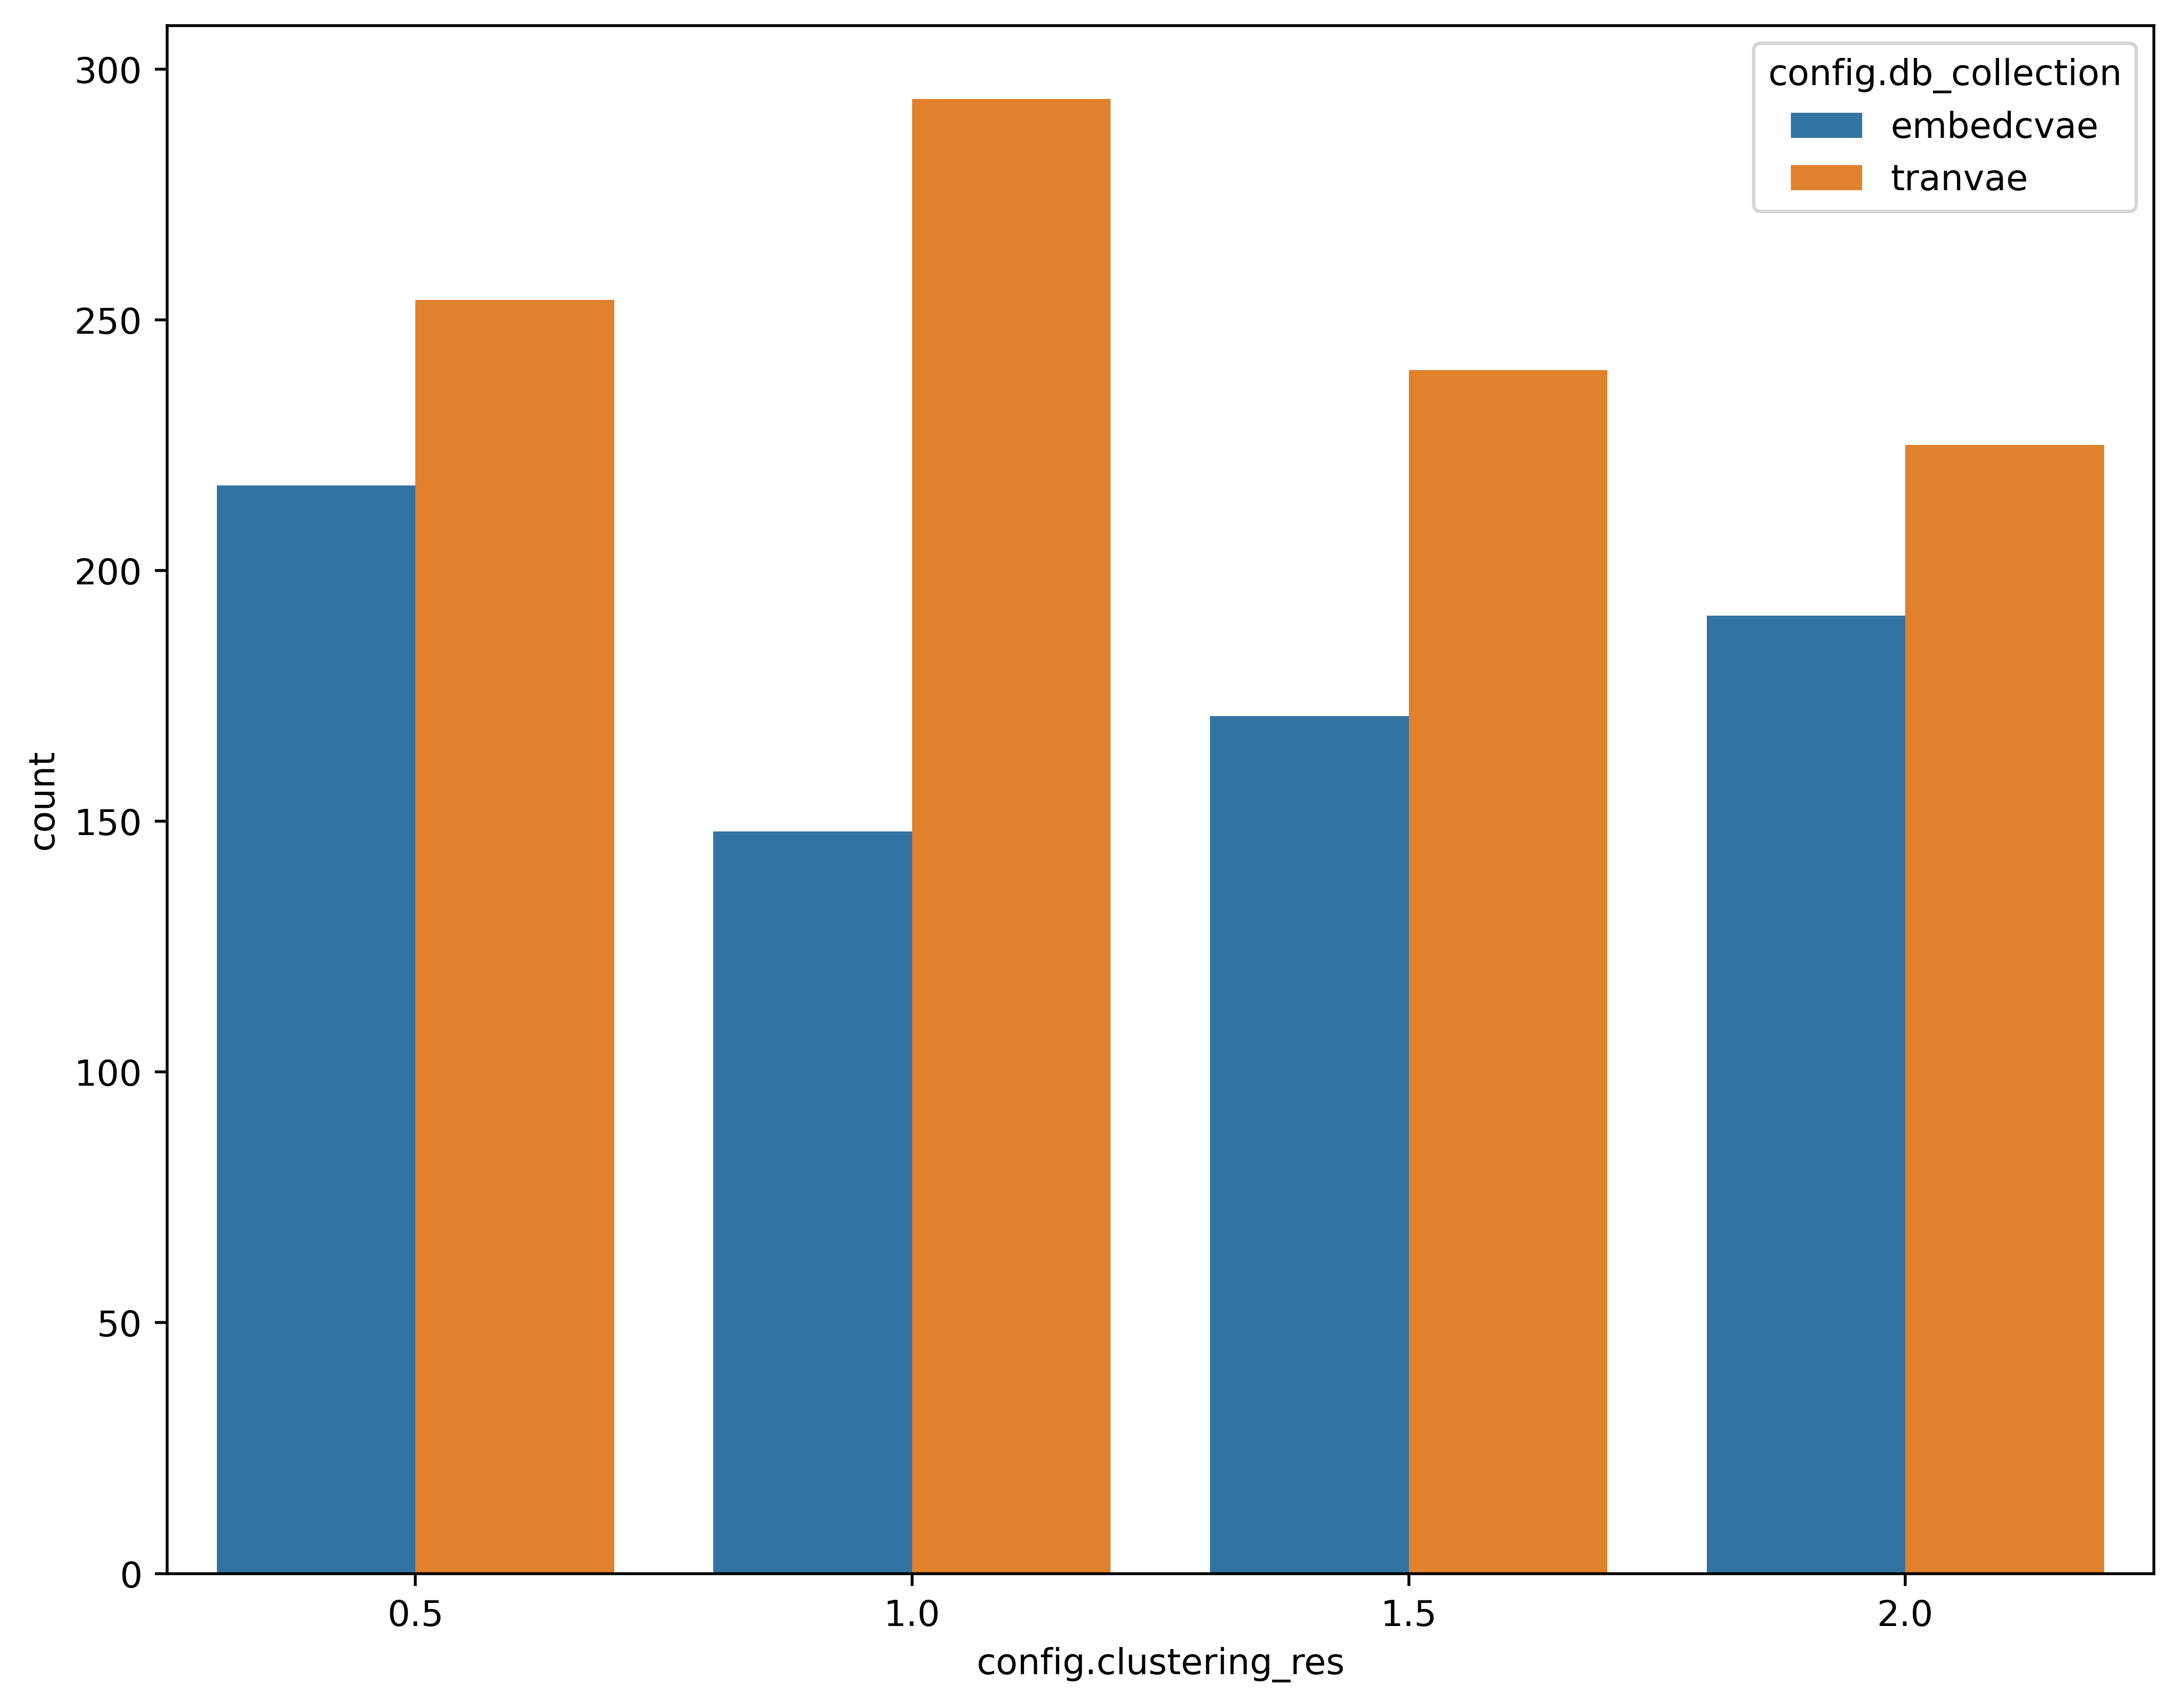

In [81]:
sns.countplot(results['config.clustering_res'], hue=results['config.db_collection'])